# Deep Learning Fraud Classifier - Overview

This project focuses on building a fraud detection tool using a machine learning pipeline to identify potentially fraudulent financial transactions. The goal is to develop an end-to-end system capable of processing raw transaction data, exploring and analyzing patterns, engineering meaningful features, training predictive models, and evaluating their performance — all while following a structured data science methodology.

Financial fraud poses a serious challenge for institutions, and detecting anomalous behavior in vast amounts of data requires a combination of domain understanding, statistical analysis, and algorithmic intelligence. This project applies those principles to build a practical detection system, leveraging both exploratory and predictive techniques.

# Pipeline Summary 

The pipeline was developed in a single, cohesive Jupyter notebook and follows the CRISP-DM (Cross-Industry Standard Process for Data Mining) framework. Here's an overview of each stage:

1. Business Understanding
- Defined the objective: detect fraud with high recall (true positive rate) and a reasonably low false positive rate.
- Considered practical constraints such as class imbalance and real-time detection requirements.

2. Data Understanding
- Loaded the dataset (not included in the repo due to large size).
- Performed initial exploration to understand class distribution, identify missing values, and inspect feature types.
- Visualized key patterns and anomalies using plots (e.g., transaction amounts, correlations).

3. Data Preparation and Preprocessing
- Handled missing values and cleaned the dataset through transformation and feature selection.
- Conducted feature engineering: created new numerical features, encoded categorical data, scaled numerical attributes.
- Addressed class imbalance using sampling techniques.

4. Modeling
- Created and trained a deep learning model
- Evaluate models using appropriate metrics (Precision, Recall, F1-score, PRC) with a focus on fraud detection sensitivity.
- Tuned hyperparameters according to the performance metrics 

5. Evaluation
- Compared models and interpreted their performance.
- Visualized confusion matrices and feature importance to understand model behavior.
  
6. Deployment Consideration
- Outlined how the model could be integrated into a live system.
- Discussed limitations and next steps (e.g., explainability using SHAP, improving precision, alert systems).
- (This will be implemented in a future project)

# Step One: Business Understanding
Imagine if you were in charge of a digital bank, once praised for speed and ease of use, found itself in trouble. Customers were noticing unauthorised transactions, charges they never made, slipping through undetected. Frustration turned into complaints, complaints turned into headlines, and soon the bank faced regulatory pressure and loss of public trust.

Realising the situation could no longer be managed with an outdated rule-based systems, the bank made a strategic decision: it needed a smarter fraud detection tool.

The objective was clear; detect fraud early, accurately, and with minimal disruption to real users. The bank assessed its position; historical transaction data was available, but fraud cases were rare and unpredictable. The team set a data science goal: build a robust machine learning model that could identify suspicious patterns, even in a sea of normal activity.

A plan took shape:

- Explore the data to understand user behavior and uncover trends (this step).
- Prepare the data by cleaning, transforming, and balancing it.
- Train predictive models using techniques that prioritize high recall without over-alerting.
- Evaluate results and lay the groundwork for real-time deployment.

This is where the pipeline begins: understanding the data behind the problem.

# Step 2: Data Understanding

The transaction dataset I've used for this pipeline comes from Kaggle. Here is the link to the dataset: https://www.kaggle.com/code/kartik2khandelwal/predicting-fraudulent-transactions/notebook

Like any other machine learning pipeline, understanding the dataset was crucial before building a model. This step focused on identifying the structure of the data, the most informative features, and any patterns that could separate fraudulent from legitimate transactions.

**Summary Statistics**

I began by examing the shape and stucture of the dataset:

- Counted rows and columns to understand scale
- Identified categorical and numerical features for tailored analysis
- Listed out each group of features to plan downstream preprocessing

This step clarified which features could be directly analyzed and which might require encoding, scaling, or transformation later.

**Correlation with Target** 

To evaluate which features carried predictive value, I calculated the Pearson correlation between each numerical feature and the target variable, isFraud. This helped highlight features with stronger relationships to fraudulent behavior and confirmed where additional feature engineering might be most effective.

**Visual Exploration**

Visual analysis provided a deeper understanding of distributions, class separations, and feature interactions:

- Histograms: Showed the ranges, skewness, and presence of outliers across numerical features.

- Violin plots: Illustrated how distributions of key features shifted between fraudulent and non-fraudulent transactions, capturing both spread and density.

- Strip plots: Highlighted individual data points and variability across classes, revealing subtle fraud-related trends.

- Correlation heatmap: Summarised pairwise correlations across all numeric features, making it easier to spot redundant predictors or feature clusters.

**Interactive Exploration**

In addition to static plots, I used an interactive data exploration tool to dynamically slice, filter, and visualize the dataset. This was especially useful for uncovering less obvious relationships and testing hypotheses quickly.

**Outcome of EDA**

This structured exploratory analysis confirmed which features displayed distinct fraud-related behavior, exposed potential redundancies, and guided the feature engineering and preprocessing choices in the next stage. By combining statistical summaries with rich visualizations, the foundation for model training was evidence-driven rather than assumption-based.

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pygwalker as pyg

data = pd.read_csv("Fraud.csv")  # Importing the dataset into a dataframe

def run_pyg(data):
    pyg.walk(data)

# Summary Statistics

def summary_stats(data):
    print("\n--- Summary Statistics ---")
    n_rows, n_cols = data.shape
    print(f"Number of rows (instances): {n_rows}")
    print(f"Number of columns (features): {n_cols}")

    numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = data.select_dtypes(exclude=[np.number]).columns.tolist()
    
    print(f"Number of numerical features: {len(numerical_features)}")
    print(f"Number of categorical features: {len(categorical_features)}")
    print(f"Numerical features: {numerical_features}")
    print(f"Categorical features: {categorical_features}")

    return numerical_features, categorical_features

# Correlation with Target ('isFraud')

def correlation_with_target(data, numerical_features, target_col):
    print("\n--- Correlation with 'isFraud' ---")
    if target_col not in data.columns:
        raise ValueError(f" Target column '{target_col}' not found!")
    
    # Compute Pearson correlation for numerical features
    correlations = {}
    for col in numerical_features:
        if col != target_col:
            # Drop NaNs for correlation computation
            valid_rows = data[[col, target_col]].dropna()
            if not valid_rows.empty:
                corr, _ = pearsonr(valid_rows[col], valid_rows[target_col])
                correlations[col] = abs(corr)
   
    # Print all correlations with isFraud
    correlation_values = sorted(correlations, key=correlations.get, reverse=True)
    print("Pearson Correlation Values with 'isFraud':")
    for feature in correlation_values:
        print(f"{feature}: {correlations[feature]:.4f}")
    
    return correlation_values, target_col

# Plotting Histograms
def plot_histograms(data):
    print("\n--- Plotting Histograms ---")
    data.hist(figsize=(12, 10), edgecolor = 'black')
    plt.tight_layout()
    plt.show()

# Plotting Violin plot
def plot_violin(data, numerical_features, target):
    print("\n--- Plotting Violin Plots ---")
    features = [f for f in numerical_features if f != target]
    n = len(features)

    ncols = 3
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
    axes = axes.flatten()

    for ax, feature in zip(axes, features):
        sns.violinplot(data=data, x=target, y=feature, ax=ax)
        ax.set_title(f'Violin Plot of {feature} by {target}')
        ax.set_xlabel(target)
        ax.set_ylabel(feature)

    for ax in axes[len(features):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

# Plotting Strip plot
def plot_strip(data, numerical_features, target):
    print("\n--- Plotting Stripplots ---")
    features = [f for f in numerical_features if f != target]
    n = len(features)

    ncols = 3
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=(5*ncols, 4*nrows))
    axes = axes.flatten()  # flatten grid to 1D list

    for ax, feature in zip(axes, features):
        sns.stripplot(data=data, x=target, y=feature, alpha=0.7, size=4, ax=ax)
        ax.set_title(f'Strip Plot of {feature} by {target}')
        ax.set_xlabel(target)
        ax.set_ylabel(feature)

    # Hide unused subplots (if features < rows*cols)
    for ax in axes[len(features):]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

# Plotting Correlation Heatmap

def plot_heatmap(data):
    print("\n--- Plotting Correlation ---")
    # Create correlation matrix from the numeric features
    # Get a list of columns that are not integers with only two unique values
    numeric_columns = [
        col for col in data.columns
        if not (data[col].dtype.kind in 'i' and data[col].nunique() == 2)
    ]

    # Create the filtered DataFrame
    filtered_df = data[numeric_columns]
    corr_matrix = filtered_df.corr(numeric_only=True)  # Calculate correlation matrix
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
    plt.title("Heatmap of Correlation between features")
    plt.tight_layout()  # Ensures the plot fits well in the figure
    plt.show()

In [2]:
run_pyg(data)

Box(children=(HTML(value='\n<div id="ifr-pyg-00063d8de6524d4bnl4dcoMAtp8hbGu3" style="height: auto">\n    <hea…


--- Summary Statistics ---
Number of rows (instances): 6362620
Number of columns (features): 11
Number of numerical features: 8
Number of categorical features: 3
Numerical features: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
Categorical features: ['type', 'nameOrig', 'nameDest']

--- Correlation with 'isFraud' ---
Pearson Correlation Values with 'isFraud':
amount: 0.0767
isFlaggedFraud: 0.0441
step: 0.0316
oldbalanceOrg: 0.0102
newbalanceOrig: 0.0081
oldbalanceDest: 0.0059
newbalanceDest: 0.0005

--- Plotting Histograms ---


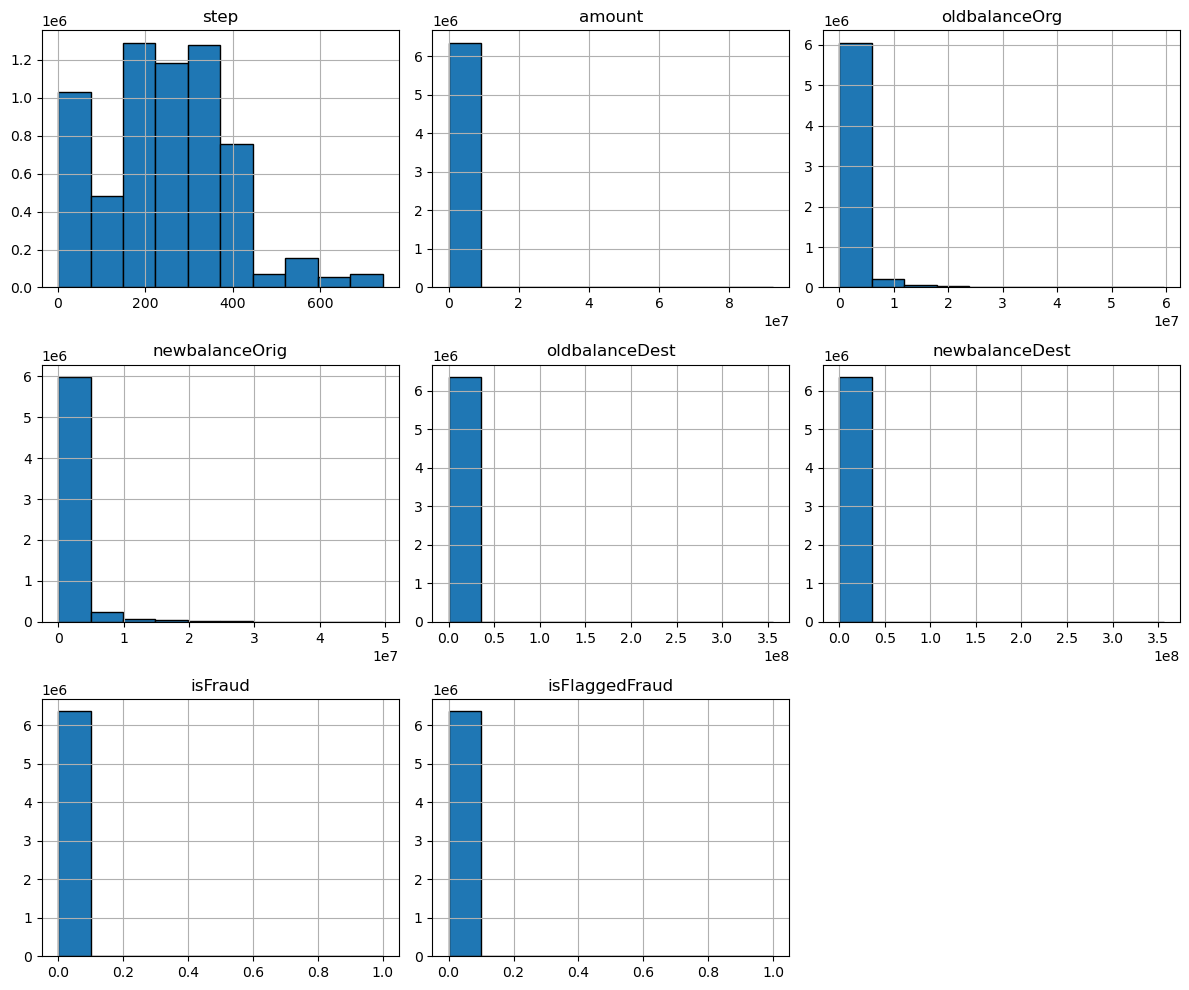


--- Plotting Correlation ---


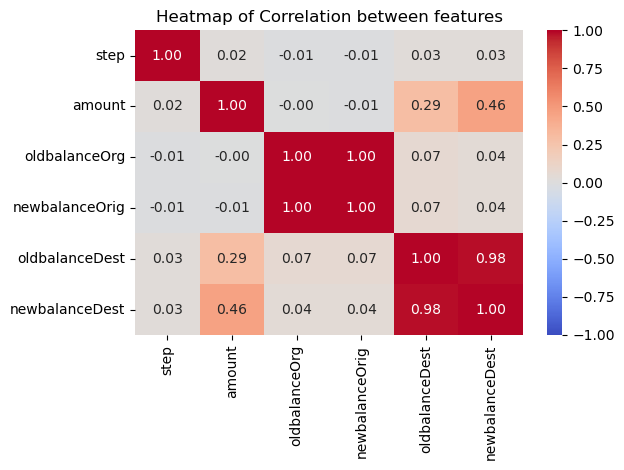


--- Plotting Violin Plots ---


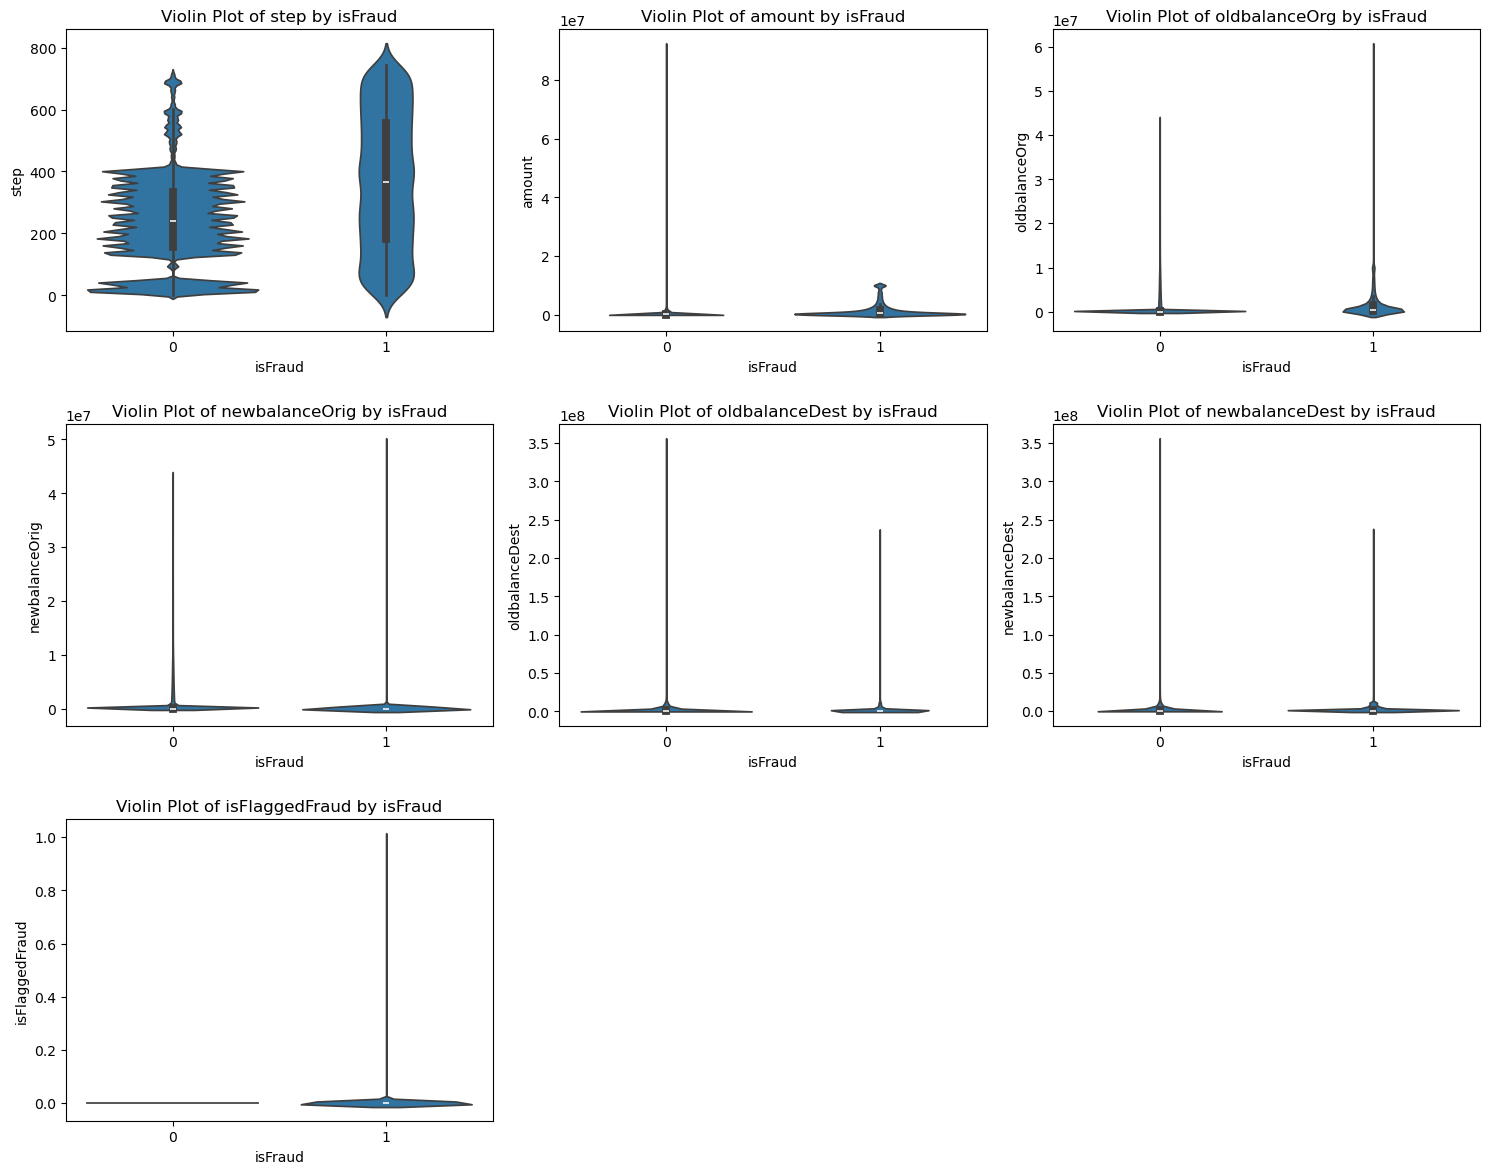

In [37]:
numerical_features, categorical_features = summary_stats(data)
correlations, target = correlation_with_target(data, numerical_features, 'isFraud')
plot_histograms(data)
plot_heatmap(data)
plot_violin(data, numerical_features, target)

# Step 3: Data Preparation

With key patterns identified during EDA, I moved into data preparation. This stage is where raw inputs are cleaned, transformed, and engineered to support effective model training.

**Dataset Splitting**

The pipeline split the data into training, validation, and test sets, maintaining consistent randomization for reproducibility. The validation set supports hyperparameter tuning, while the test set provides an unbiased final evaluation.

**Dual Dataset Strategy**

To address the severe class imbalance in fraud detection, I prepared two datasets:

1. Full dataset: preserves the real-world imbalance.
2. Sampled dataset: balances the classes (fraud vs. non-fraud) to help models learn minority class patterns more effectively (customisable).

This dual approach allows for:

* Robust model evaluation (real-world test on the imbalanced dataset).
* Better training performance on the rare fraud class using the balanced sample.

**Handling Missing Values and Imputation**

I systematically checked for missing values across both numerical and categorical features. While the dataset itself contained no missing entries, the pipeline was designed to handle them if present, using these impuation methods:

* Numerical features: imputed using a KNN-based strategy, which uses feature similarity to estimate missing values.
* Categorical features: imputed using the most frequent (mode) value.

This ensures the pipeline is robust to incomplete datasets in future scenarios.

**Feature Engineering**

To provide the model with more signal, I constructed new transaction-derived features, such as:

- differenceOrg = change in origin account balance
- differenceDest = change in destination account balance

Additional custom features can be flexibly added through a transformation framework (supporting operations like add, subtract, multiply, divide, mean, min, max). This modular approach makes the pipeline extensible for future domain-specific insights.

**Adaptive Numerical Feature Transformation**

To prepare the numerical features for training, I implemented an adaptive transformation strategy based on the skewness and distribution of each feature. The goal was to normalize skewed distributions and standardize the data for better model performance, especially in neural networks.

* Skewness Analysis: Each numerical feature's skewness was computed to determine if transformation was necessary.
* Log1p Transformation: Applied to heavily right-skewed features with strictly positive values, compressing extreme outliers.
* Yeo-Johnson Transformation: Applied to features with negative values or unsuitable for log1p, providing a flexible normalization strategy.

This step systematically improved feature distributions without over-engineering.

**Sampling the Dataset**

To address imbalance while controlling dataset size, I implemented a configurable stratified sampling method:

Specifically:

* Fraud ratio parameter: sets the desired proportion of fraud cases in the sample (e.g. 2%).
* Sample size ratio: defines the total sample size as a fraction of the full dataset (e.g. 50%).
* Both fraud and non-fraud transactions are downsampled accordingly.

This flexible sampling approach enables tuning the dataset composition to match changing business priorities and computational constraints.

**Encoding & Feature Reduction**

Final preprocessing steps included:

* One-hot encoding of categorical features (e.g. transaction type), ensuring models can learn from non-numeric inputs.
* Dropping irrelevant or redundant features, reducing noise and mitigating overfitting risks.

**Normalization**

As a final transformation step, I applied standard scaling to ensure all continuous numerical features contribute on a comparable scale. This normalization is especially important for distance-based models and gradient-based optimization.

**EDA Revisited**

After preprocessing, I re-ran EDA on the concatination of the X and y training sets of the full and sampled datasets to confirm:

* Distributions were normalized (mostly)
* Class separability improved 
* Engineered features added meaningful variation

This completed the preparation phase and ensured both datasets were ready for modeling.

In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler

# Splitting the dataset

def create_sets(df, train_temp_ratio, val_test_ratio, target):
    X = df.drop(columns=[target])
    y = df[target]
    
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=train_temp_ratio, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = val_test_ratio, random_state = 42)
    
    return X_train, X_val, X_test, y_train, y_val, y_test


# Missing Values inspection

def handle_missing_values(df):
    missing_counts = df.isnull().sum()
    missing_counts = missing_counts[missing_counts > 0]
    if missing_counts.empty:
        print("No missing values found!")
    else:
        for col, count in missing_counts.items():
            percent = 100 * count / len(df)
            print(f"{col}: {count} missing values ({percent:.2f}%)")
        print(f"Total missing values: {missing_counts.sum()}")
    return df



# Numerical + Categorical Imputation

def fit_impute_data(train_df, n_neighbors=2):
    numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = train_df.select_dtypes(exclude=[np.number]).columns.tolist()

    imputed_train = train_df.copy()

    # Numerical Imputer
    knn_imputer = None
    if numerical_features:
        knn_imputer = KNNImputer(n_neighbors=n_neighbors)
        imputed_numerical = knn_imputer.fit_transform(imputed_train[numerical_features])
        imputed_train[numerical_features] = pd.DataFrame(
            imputed_numerical, columns=numerical_features, index=imputed_train.index
        )

    # Categorical Imputer (mode)
    cat_imputers = {}
    for col in categorical_features:
        mode_val = imputed_train[col].mode()[0] if not imputed_train[col].mode().empty else "Unknown"
        imputed_train[col] = imputed_train[col].fillna(mode_val)
        cat_imputers[col] = mode_val

    print("Imputations fitted and applied (numerical → KNN, categorical → mode)")
    return knn_imputer, cat_imputers, imputed_train


def transform_impute_data(test_df, knn_imputer, cat_imputers):
    imputed_test = test_df.copy()

    # Numerical
    numerical_features = test_df.select_dtypes(include=[np.number]).columns.tolist()
    if knn_imputer is not None and numerical_features:
        imputed_numerical = knn_imputer.transform(imputed_test[numerical_features])
        imputed_test[numerical_features] = pd.DataFrame(
            imputed_numerical, columns=numerical_features, index=imputed_test.index
        )

    # Categorical
    for col, mode_val in cat_imputers.items():
        imputed_test[col] = imputed_test[col].fillna(mode_val)

    print("Imputations applied to test set")
    return imputed_test



# Feature Construction (row-wise, safe before split)

def feature_construct(df, transformations):
    operations = {
        'add': lambda cols: cols[0] + cols[1],
        'sub': lambda cols: cols[0] - cols[1],
        'mul': lambda cols: cols[0] * cols[1],
        'div': lambda cols: cols[0] / cols[1],
        'mean': lambda cols: sum(cols) / len(cols),
        'max': lambda cols: pd.concat(cols, axis=1).max(axis=1),
        'min': lambda cols: pd.concat(cols, axis=1).min(axis=1),
    }

    for t in transformations:
        new_feature = t['new_feature']
        columns = t['columns']
        operation = t['operation']

        col_data = [df[col] for col in columns]
        if callable(operation):
            df[new_feature] = operation(col_data)
        elif isinstance(operation, str) and operation in operations:
            df[new_feature] = operations[operation](col_data)

    print("New features successfully constructed")
    return df



# Adaptive Transform (fit/transform)

def fit_adaptive_transform(train_df, skew_threshold=0.75, log1p_pos_threshold=0.9):
    transformers = {}
    transformed_train = train_df.copy()

    numerical_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
    if 'isFraud' in numerical_features:
        numerical_features.remove('isFraud')

    for feature in numerical_features:
        feature_data = transformed_train[feature].dropna()
        feature_skew = skew(feature_data)
        positive_ratio = (transformed_train[feature] > 0).sum() / len(transformed_train[feature])

        if abs(feature_skew) < skew_threshold:
            transformers[feature] = None
            continue

        if feature_skew > skew_threshold and positive_ratio >= log1p_pos_threshold:
            transformed_train[feature] = np.log1p(transformed_train[feature])
            transformers[feature] = "log1p"
        else:
            pt = PowerTransformer(method='yeo-johnson', standardize=False)
            transformed_train[[feature]] = pt.fit_transform(transformed_train[[feature]])
            transformers[feature] = pt

    print("Adaptive transform fitted and applied to train")
    return transformers, transformed_train


def transform_adaptive_transform(test_df, transformers):
    transformed_test = test_df.copy()
    for feature, transformer in transformers.items():
        if transformer is None:
            continue
        elif transformer == "log1p":
            transformed_test[feature] = np.log1p(transformed_test[feature])
        else:
            transformed_test[[feature]] = transformer.transform(transformed_test[[feature]])
    print("Adaptive transform applied to test")
    return transformed_test


# Sampling

def create_sample_size(df, fraud_ratio, sample_ratio):
    total_sample_size = int(len(df) * sample_ratio)
    n_fraud = int(total_sample_size * fraud_ratio)
    n_nonfraud = total_sample_size - n_fraud

    class1 = df[df['isFraud'] == 1]
    class0 = df[df['isFraud'] == 0]

    n_fraud = min(n_fraud, len(class1))
    n_nonfraud = min(n_nonfraud, len(class0))

    sample1 = class1.sample(n=n_fraud, random_state=42, replace=False)
    sample0 = class0.sample(n=n_nonfraud, random_state=42, replace=False)

    sampled_df = pd.concat([sample1, sample0])
    sampled_df = shuffle(sampled_df, random_state=42).reset_index(drop=True)

    print(f"Sampled dataset size: {len(sampled_df)} (target was {total_sample_size})")
    print(f"Fraud ratio in sample: {sampled_df['isFraud'].mean():.4f}")
    return sampled_df

# Dropping features

def drop_features(df, irrel_features):
    df = df.drop(irrel_features, axis=1, errors='ignore')
    print("Dropping of features successful")
    return df

# Encoding categorical features (fit/transform)

def fit_encode_cat(train_df, cat_features):
    # Create a copy to avoid modifying the original dataframe
    train_df = train_df.copy()
    
    # Get all unique categories from the training data for each feature
    all_categories = {}
    for feature in cat_features:
        all_categories[feature] = sorted(train_df[feature].astype('category').unique())
    
    # Perform one-hot encoding
    encoded_train = pd.get_dummies(train_df, columns=cat_features, dtype=int)
    
    # Ensure correct column order for consistency
    train_encoded_df = encoded_train.reindex(columns=encoded_train.columns)
    
    print("Categorical encoding applied to train")
    
    return all_categories, train_encoded_df


def transform_encode_cat(test_df, cat_features, all_categories):
    test_df = test_df.copy()
    
    # Perform one-hot encoding on the test set
    encoded_test = pd.get_dummies(test_df, columns=cat_features, dtype=int)
    
    # Create a list of all expected columns based on training categories
    expected_columns = []
    for feature, categories in all_categories.items():
        for category in categories:
            expected_columns.append(f"{feature}_{category}")
    
    # Reindex the encoded test dataframe to align with the training columns
    # and fill any missing columns with zeros for unseen categories
    test_encoded_df = encoded_test.reindex(columns=expected_columns, fill_value=0)
    
    # Preserve the original non-categorical columns
    non_cat_columns = [col for col in test_df.columns if col not in cat_features]
    test_encoded_df = pd.concat([test_df[non_cat_columns], test_encoded_df], axis=1)

    print("Categorical encoding applied to test set")
    
    return test_encoded_df


def normalize_x(X_train, X_val, X_test):
    # Create copies to prevent modifying the original dataframes
    X_train_normalized = X_train.copy()
    X_val_normalized = X_val.copy()
    X_test_normalized = X_test.copy()

    # Identify numeric columns for scaling
    numeric_cols = [
        col for col in X_train.columns
        if not (X_train[col].dtype.kind in 'i' and X_train[col].nunique() == 2)
    ]

    # Initialize the scaler
    scaler = StandardScaler()

    # Fit and transform the training data, then transform the validation and test data
    X_train_normalized[numeric_cols] = scaler.fit_transform(X_train_normalized[numeric_cols])
    X_val_normalized[numeric_cols] = scaler.transform(X_val_normalized[numeric_cols])
    X_test_normalized[numeric_cols] = scaler.transform(X_test_normalized[numeric_cols])

    print("Normalization applied on numeric features successful")

    return X_train_normalized, X_val_normalized, X_test_normalized


In [66]:
dataset1 = data.copy()

# --- 2. Feature construction (safe to do before splitting) ---
dataset1 = feature_construct(dataset1, [
    {'new_feature': 'differenceOrg', 'columns': ['oldbalanceOrg', 'newbalanceOrig'], 'operation': 'sub'}, 
    {'new_feature': 'differenceDest', 'columns': ['oldbalanceDest', 'newbalanceDest'], 'operation': 'sub'}
])

dataset1 = create_sample_size(dataset1, fraud_ratio=0.02, sample_ratio=0.1)

X_train_sampled, X_val_sampled, X_test_sampled, y_train_sampled, y_val_sampled, y_test_sampled = create_sets(
    dataset1,
    0.4,
    0.5,
    target='isFraud'
)

# --- 4. Fit + transform on TRAIN ---
X_train_sampled = handle_missing_values(X_train_sampled)
knn_imputer, cat_imputers, X_train_sampled = fit_impute_data(X_train_sampled)
transformers, X_train_sampled = fit_adaptive_transform(X_train_sampled, skew_threshold=0.70, log1p_pos_threshold=0.9)
categories, X_train_sampled = fit_encode_cat(X_train_sampled, ['type'])
X_train_sampled = drop_features(X_train_sampled, ['isFlaggedFraud', 'nameOrig', 'nameDest'])

# --- 5. Transform only on VAL ---
X_val_sampled = handle_missing_values(X_val_sampled )
X_val_sampled = transform_impute_data(X_val_sampled , knn_imputer, cat_imputers)
X_val_sampled = transform_adaptive_transform(X_val_sampled , transformers)
X_val_sampled = transform_encode_cat(X_val_sampled , ['type'], categories)
X_val_sampled = drop_features(X_val_sampled , ['isFlaggedFraud', 'nameOrig', 'nameDest'])

# --- 6. Transform only on TEST ---
X_test_sampled = handle_missing_values(X_test_sampled)
X_test_sampled = transform_impute_data(X_test_sampled, knn_imputer, cat_imputers)
X_test_sampled = transform_adaptive_transform(X_test_sampled, transformers)
X_test_sampled = transform_encode_cat(X_test_sampled, ['type'], categories)
X_test_sampled = drop_features(X_test_sampled, ['isFlaggedFraud', 'nameOrig', 'nameDest'])

X_train_sampled, X_val_sampled, X_test_sampled = normalize_x(X_train_sampled, X_val_sampled, X_test_sampled)

New features successfully constructed
Sampled dataset size: 631750 (target was 636262)
Fraud ratio in sample: 0.0130
No missing values found!
Imputations fitted and applied (numerical → KNN, categorical → mode)
Adaptive transform fitted and applied to train
Categorical encoding applied to train
Dropping of features successful
No missing values found!
Imputations applied to test set
Adaptive transform applied to test
Categorical encoding applied to test set
Dropping of features successful
No missing values found!
Imputations applied to test set
Adaptive transform applied to test
Categorical encoding applied to test set
Dropping of features successful
Normalization applied on numeric features successful


In [115]:
dataset2 = data.copy()

# Feature construction (safe to do before splitting) 
dataset2 = feature_construct(dataset2, [
    {'new_feature': 'differenceOrg', 'columns': ['oldbalanceOrg', 'newbalanceOrig'], 'operation': 'sub'}, 
    {'new_feature': 'differenceDest', 'columns': ['oldbalanceDest', 'newbalanceDest'], 'operation': 'sub'}
])

X_train_unsampled, X_val_unsampled, X_test_unsampled, y_train_unsampled, y_val_unsampled, y_test_unsampled = create_sets(
    dataset2,
    0.4,
    0.5,
    target='isFraud'
)

# Fit + transform on TRAIN
X_train_unsampled = handle_missing_values(X_train_unsampled)
knn_imputer, cat_imputers, X_train_unsampled = fit_impute_data(X_train_unsampled)
transformers, X_train_unsampled = fit_adaptive_transform(X_train_unsampled, skew_threshold=0.70, log1p_pos_threshold=0.9)
encoder, X_train_unsampled = fit_encode_cat(X_train_unsampled, ['type'])
X_train_unsampled = drop_features(X_train_unsampled, ['isFlaggedFraud', 'nameOrig', 'nameDest'])

# 5. Transform only on VAL 
X_val_unsampled = handle_missing_values(X_val_unsampled )
X_val_unsampled = transform_impute_data(X_val_unsampled , knn_imputer, cat_imputers)
X_val_unsampled = transform_adaptive_transform(X_val_unsampled , transformers)
X_val_unsampled = transform_encode_cat(X_val_unsampled , ['type'], encoder)
X_val_unsampled = drop_features(X_val_unsampled , ['isFlaggedFraud', 'nameOrig', 'nameDest'])

# Transform only on TEST 
X_test_unsampled = handle_missing_values(X_test_unsampled)
X_test_unsampled = transform_impute_data(X_test_unsampled, knn_imputer, cat_imputers)
X_test_unsampled = transform_adaptive_transform(X_test_unsampled, transformers)
X_test_unsampled = transform_encode_cat(X_test_unsampled, ['type'], encoder)
X_test_unsampled = drop_features(X_test_unsampled, ['isFlaggedFraud', 'nameOrig', 'nameDest'])

# Normalize X numeric features
X_train_unsampled, X_val_unsampled, X_test_unsampled = normalize_x(X_train_unsampled, X_val_unsampled, X_test_unsampled)

New features successfully constructed
No missing values found!
Imputations fitted and applied (numerical → KNN, categorical → mode)
Adaptive transform fitted and applied to train
Categorical encoding applied to train
Dropping of features successful
No missing values found!
Imputations applied to test set
Adaptive transform applied to test
Categorical encoding applied to test set
Dropping of features successful
No missing values found!
Imputations applied to test set
Adaptive transform applied to test
Categorical encoding applied to test set
Dropping of features successful
Normalization applied on numeric features successful



--- Summary Statistics ---
Number of rows (instances): 379050
Number of columns (features): 14
Number of numerical features: 14
Number of categorical features: 0
Numerical features: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'differenceOrg', 'differenceDest', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'isFraud']
Categorical features: []

--- Correlation with 'isFraud' ---
Pearson Correlation Values with 'isFraud':
differenceOrg: 0.3965
type_TRANSFER: 0.1648
amount: 0.1252
oldbalanceOrg: 0.1112
step: 0.0966
newbalanceOrig: 0.0932
differenceDest: 0.0884
type_PAYMENT: 0.0808
type_CASH_IN: 0.0604
oldbalanceDest: 0.0543
type_CASH_OUT: 0.0356
newbalanceDest: 0.0219
type_DEBIT: 0.0092

--- Plotting Histograms ---


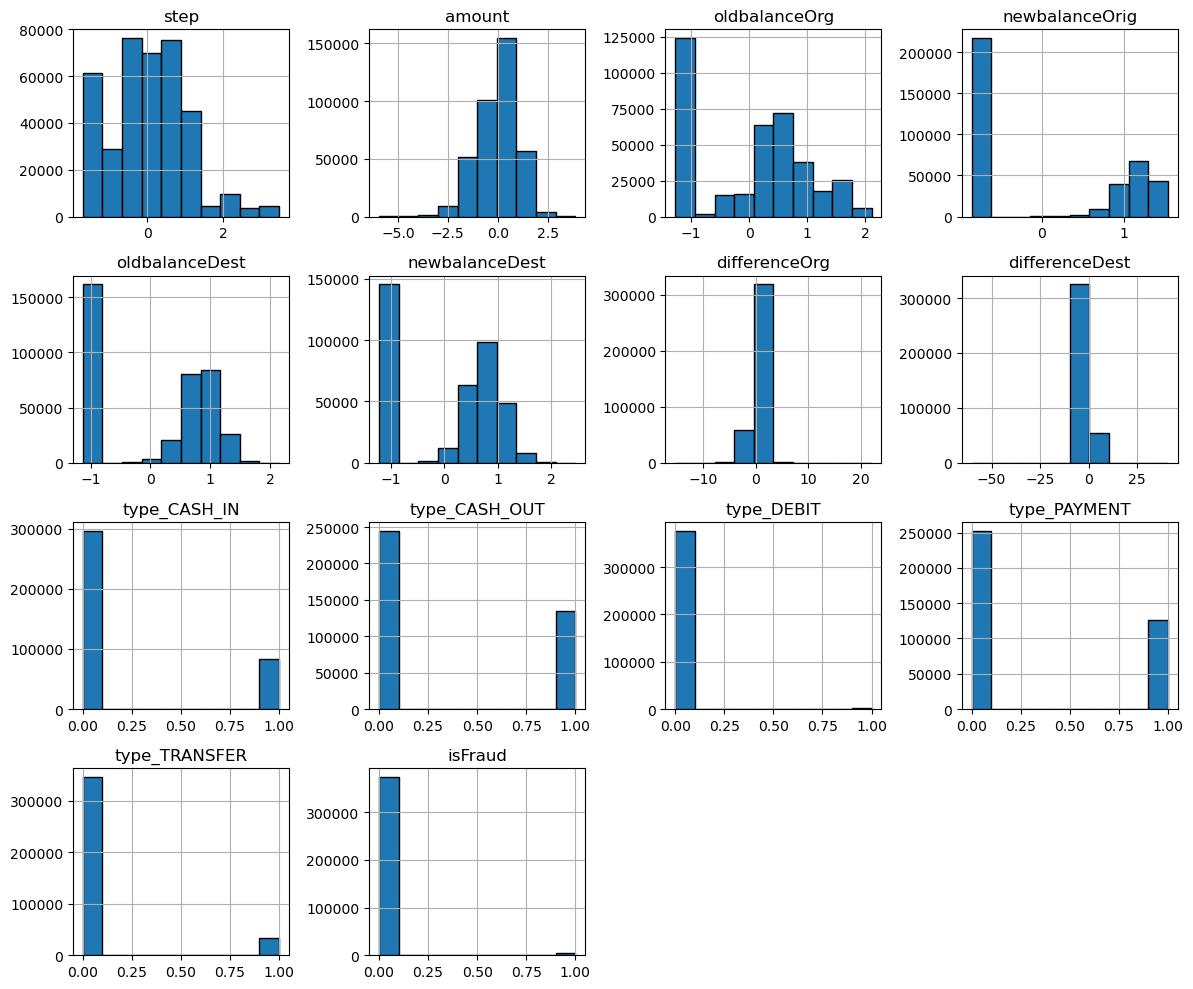


--- Plotting Correlation ---


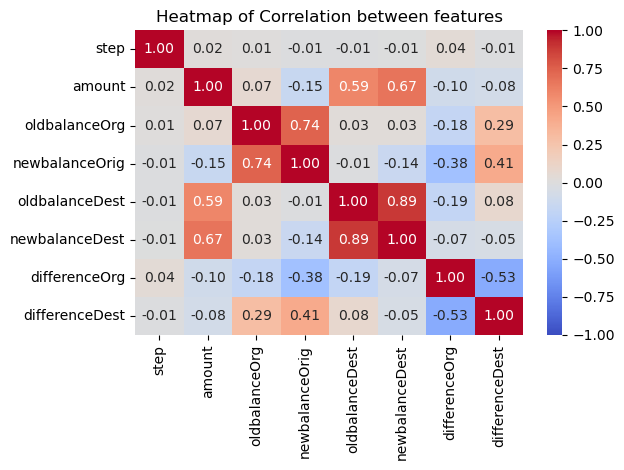


--- Plotting Violin Plots ---


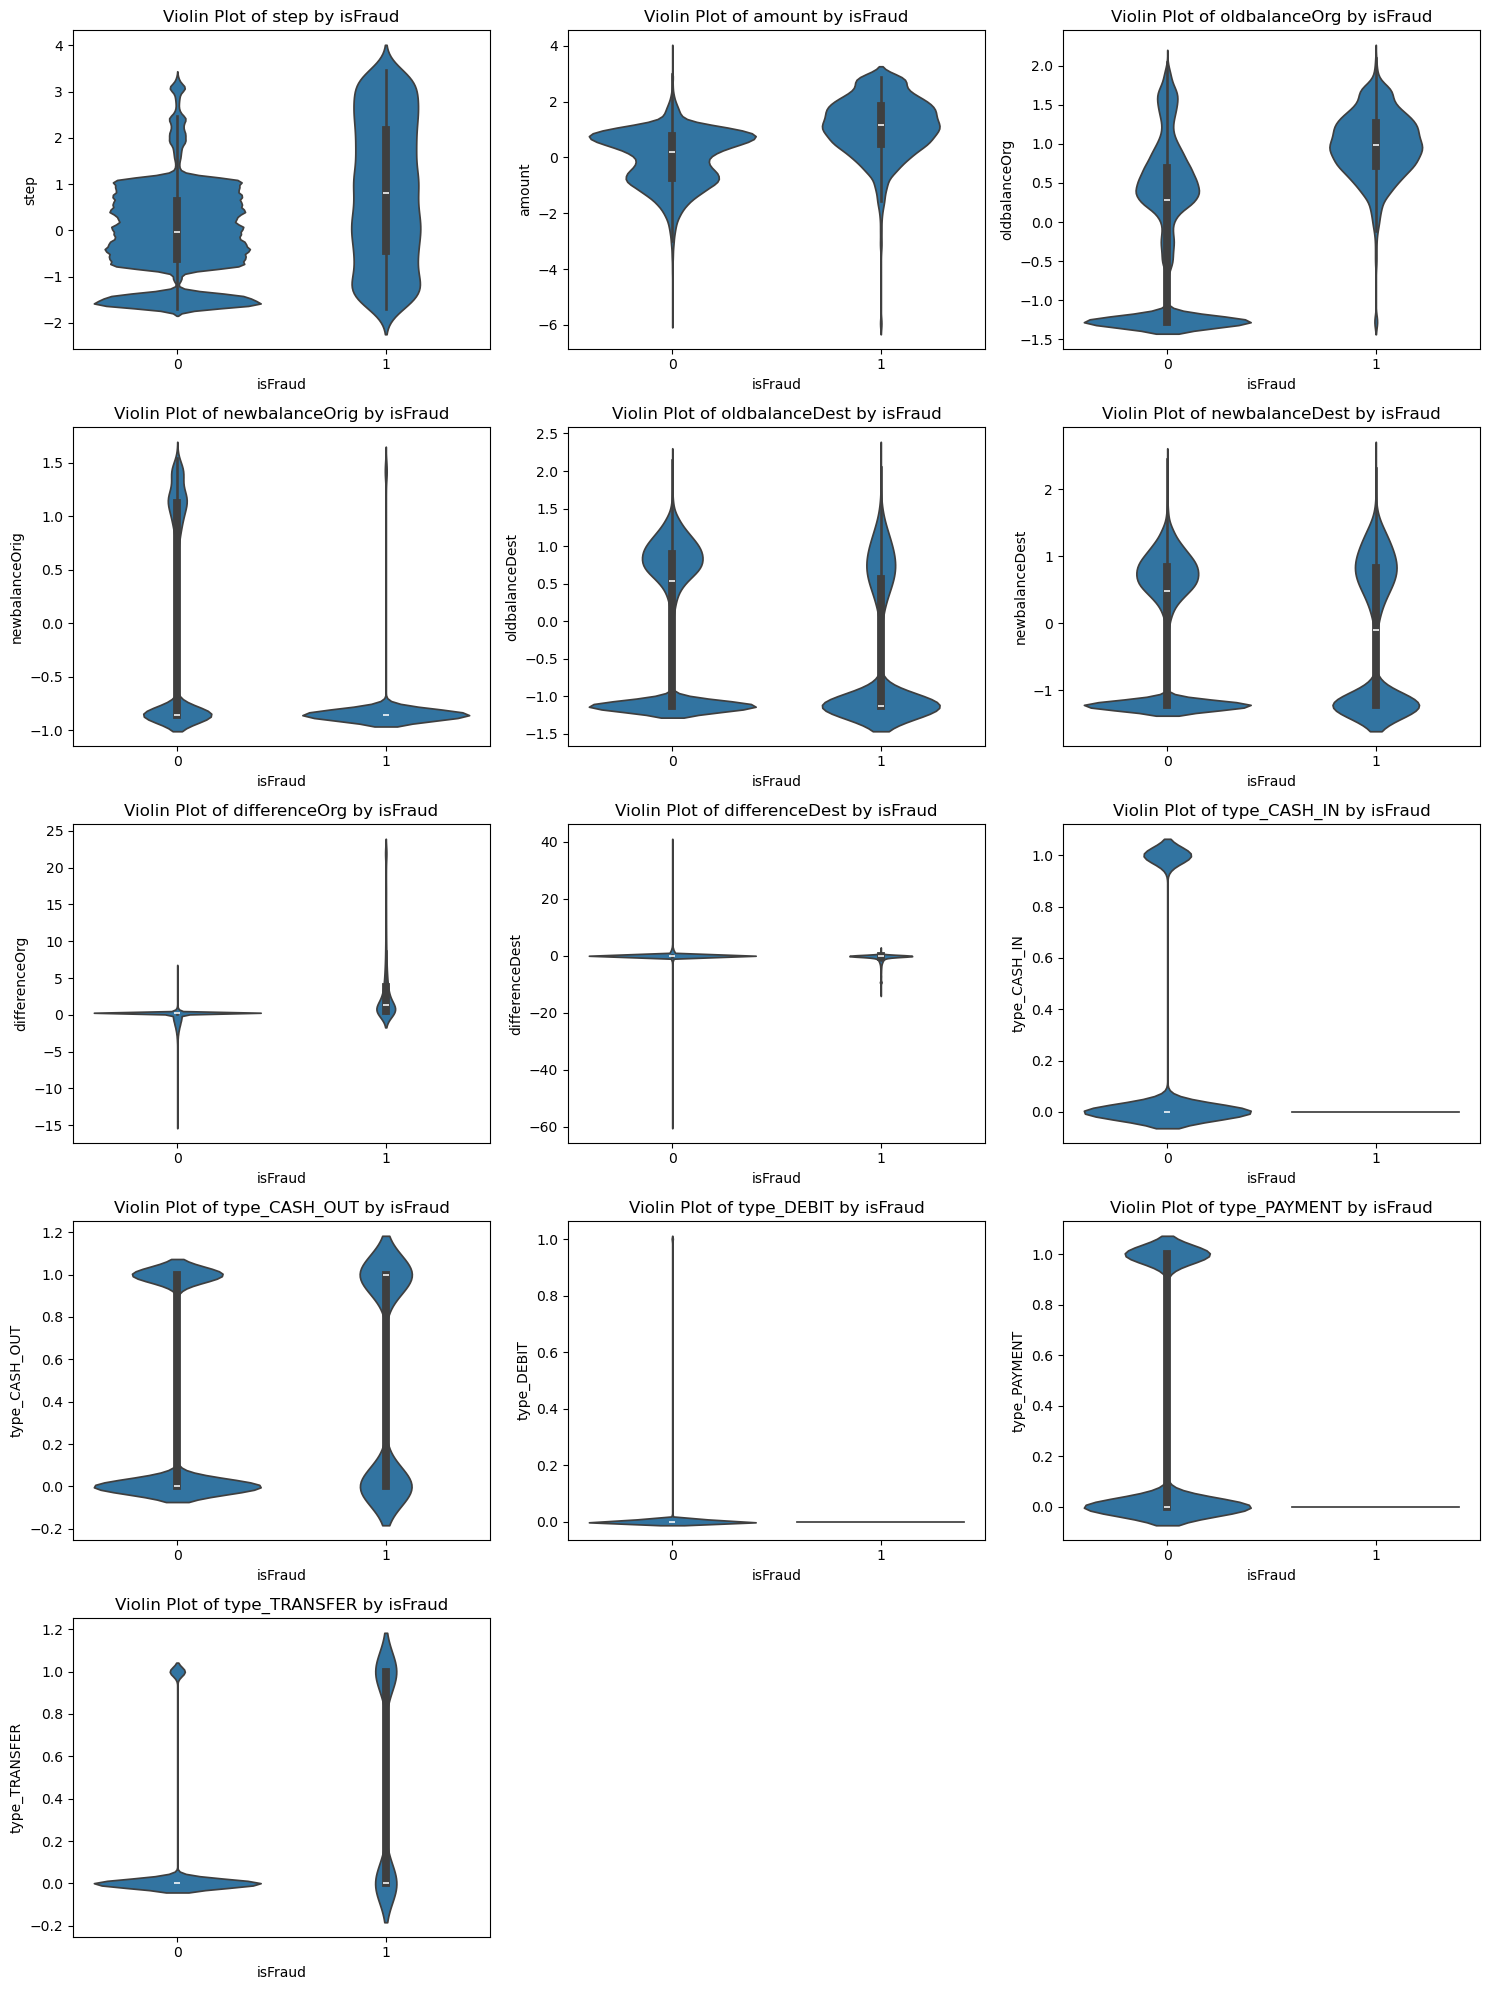

In [67]:
sampled_pd = pd.concat([X_train_sampled, y_train_sampled], axis=1)

new_numerical_features1, new_categorical_features1 = summary_stats(sampled_pd)
new_correlations1, target1 = correlation_with_target(sampled_pd, new_numerical_features1, 'isFraud')
plot_histograms(sampled_pd)
plot_heatmap(sampled_pd)
plot_violin(sampled_pd, new_numerical_features1, target1)


--- Summary Statistics ---
Number of rows (instances): 3817572
Number of columns (features): 14
Number of numerical features: 14
Number of categorical features: 0
Numerical features: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'differenceOrg', 'differenceDest', 'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'isFraud']
Categorical features: []

--- Correlation with 'isFraud' ---
Pearson Correlation Values with 'isFraud':
differenceOrg: 0.3436
type_TRANSFER: 0.0536
amount: 0.0414
oldbalanceOrg: 0.0359
step: 0.0324
newbalanceOrig: 0.0295
differenceDest: 0.0291
type_PAYMENT: 0.0257
type_CASH_IN: 0.0191
oldbalanceDest: 0.0171
type_CASH_OUT: 0.0115
newbalanceDest: 0.0067
type_DEBIT: 0.0029

--- Plotting Histograms ---


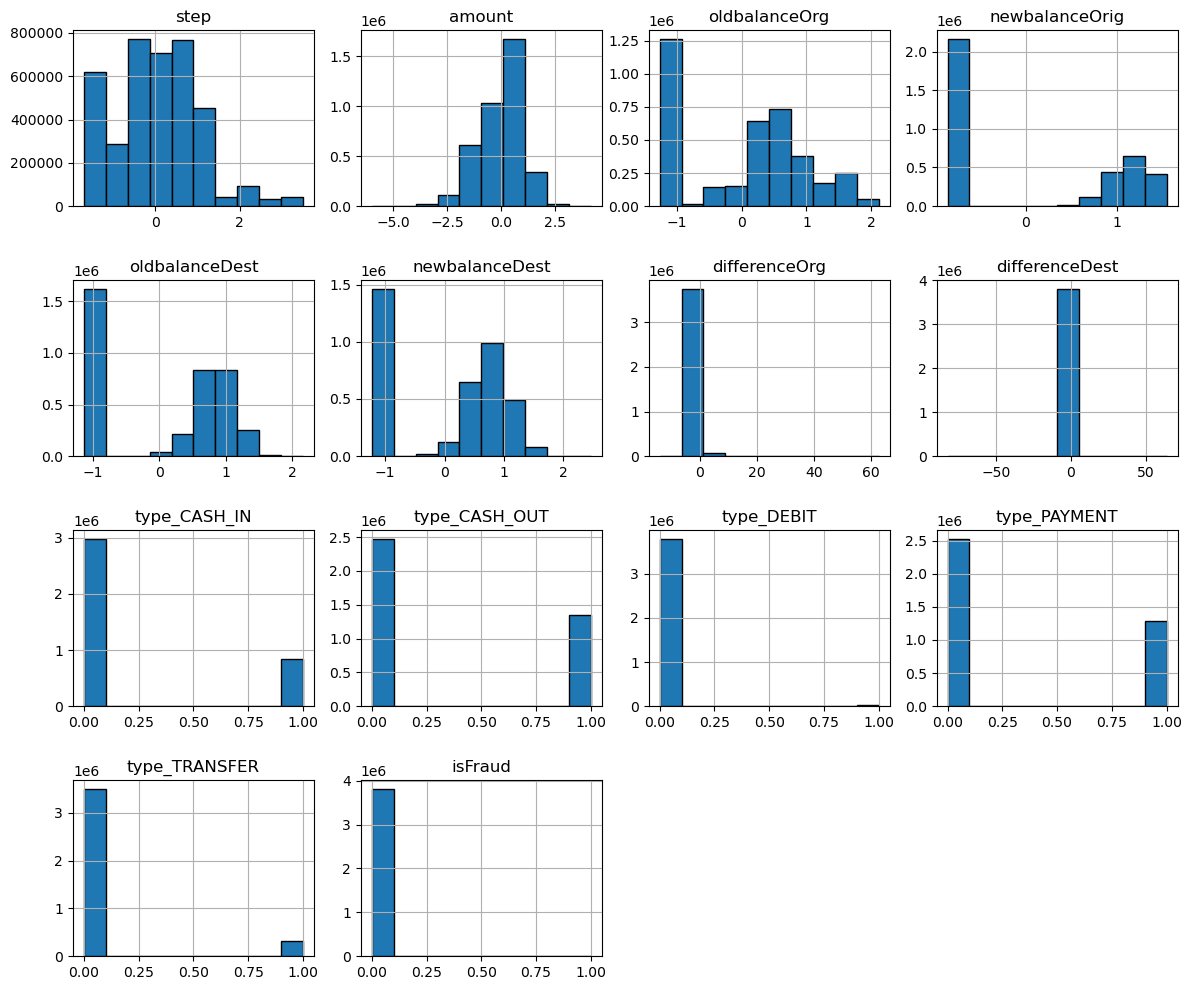


--- Plotting Correlation ---


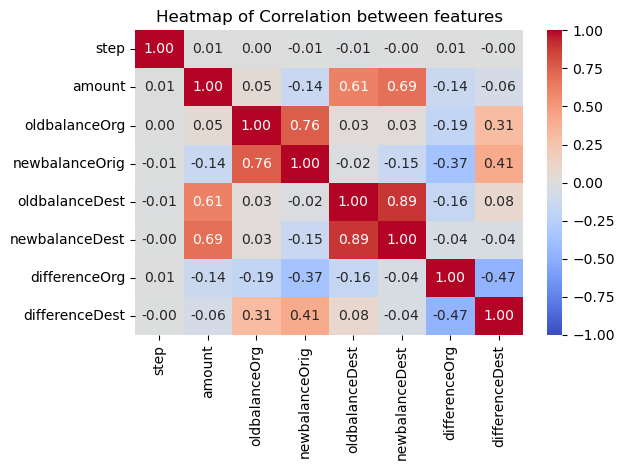


--- Plotting Violin Plots ---


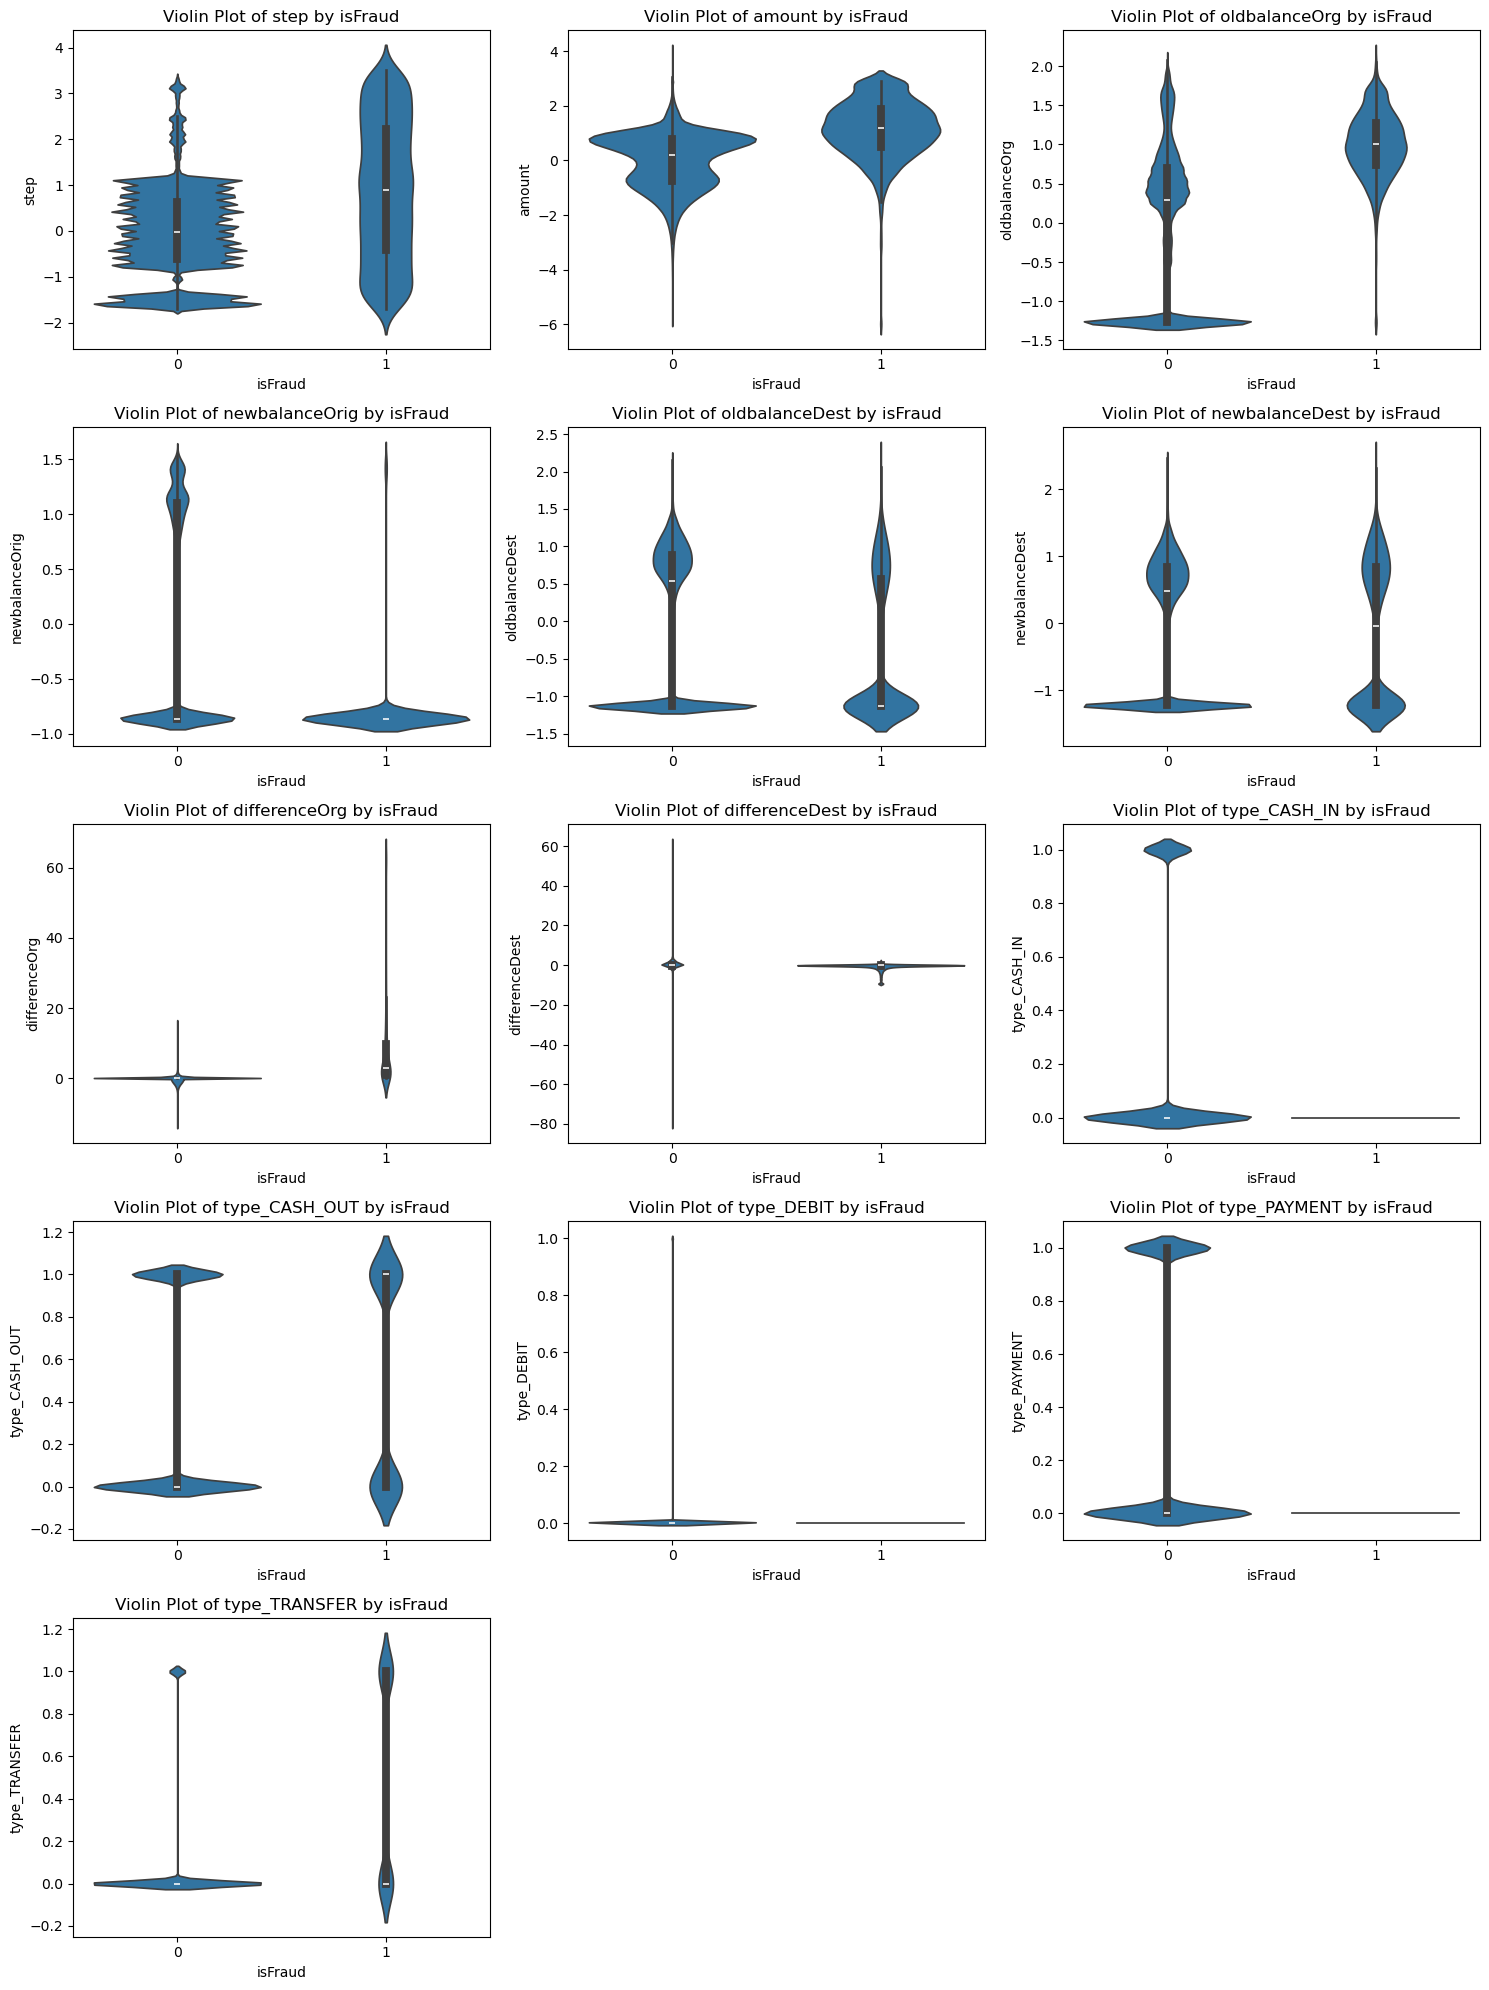

In [71]:
unsampled_pd = pd.concat([X_train_unsampled, y_train_unsampled], axis=1)

new_numerical_features2, new_categorical_features2 = summary_stats(unsampled_pd)
new_correlations2, target2 = correlation_with_target(unsampled_pd, new_numerical_features2, 'isFraud')
plot_histograms(unsampled_pd)
plot_heatmap(unsampled_pd)
plot_violin(unsampled_pd, new_numerical_features2, target2)

# Step 4: Modelling

With the two datasets prepared and insights gathered, the next step was to train models capable of accurately classifying transactions as fraudulent or legitimate. The modelling stage proceeds along two tracks:

* Classical baselines (scikit-learn) for fast, interpretable benchmarks.
* Customisable PyTorch neural network for richer nonlinear capacity and fine-grained control.

Both sampled and unsampled datasets were used to compare performance under realistic imbalance versus balanced learning conditions. To streamline tooling, features/labels were first converted to NumPy arrays for the scikit-learn models, and then to PyTorch tensors with DataLoaders (shuffled training, fixed validation/test). Larger batch sizes were used on the unsampled set to maintain throughput.

**Baseline: Models**

I trained a suite of classical models to establish performance baselines, validate preprocessing choices, and expose trade-offs in speed, capacity, and calibration:

* Logistic Regression: A linear model to set the baseline. It was fast to train and interpret but struggled with the highly nonlinear nature of fraudulent transaction patterns.
* Support Vector Machine (SVM): Implemented with a kernel to capture nonlinear decision boundaries. However, training time increased significantly on the larger dataset, highlighting scalability issues.
* Naive Bayes (BernoulliNB) – strong baseline for binary/indicator features; useful contrast against other linear methods.
* k-Nearest Neighbours (k-NN) – instance-based learner; sensitive to scaling and class imbalance, but informative for local structure.
* Decision Tree – non-linear splits with straightforward interpretability.
* Random Forest (RF): A tree-based ensemble model that performed better than linear approaches by capturing feature interactions. It also provided feature importance scores, which were useful for interpretability.

These baselines set realistic expectations and confirmed the need for a more expressive model.

**Neural Network Architecture**

To better capture nonlinear relationships, I built a configurable feedforward network that you can define at run-time when you “perform” a training run:

* Architecture on demand: you specify the number of hidden layers, the number of neurons per layer, and an activation function per layer.
* Activation registry: supports ReLU, LeakyReLU, ELU, PReLU, RReLU, SiLU, Sigmoid, Tanh, Softmax, LogSigmoid, enabling rapid ablation and matching to dataset characteristics.
* Output: a single logit (binary classification). Probabilities are obtained via a sigmoid at inference; the classification threshold is also configurable (not fixed at 0.5).

This design lets you move from the specific architecture you documented earlier (e.g., 36-48-28 with mixed activations) to any topology you want, without code changes to the model class.

**Training Strategy for the Neural Networks**

* Loss Function: BCEWithLogitsLoss with pos_weight to compensate for class imbalance, putting more emphasis on correctly classifying more fraudulent cases as possible.
* Optimizer: Adam (lr = 0.001) for efficient convergence.
* Optimiser selection at run-time: choose among Adam, SGD, Momentum SGD, Nesterov, Adagrad, Adadelta, RMSprop, along with learning rate and momentum—all configurable when you launch a run.
* Device: Model is trained on GPU if available for faster execution.
* Batching: DataLoaders handle mini-batches (training shuffled, validation/test non-shuffled); larger batch sizes were used for the unsampled set for efficiency.
* Epochs & logging: per-epoch loss and accuracy are tracked for monitoring convergence.

**Validation Metrics**

Each model was trained on the training split and validated on the validation split to track performance. For every model, I generated:

* Confusion Matrix (class distribution of predictions),
* Precision–Recall (PR) Curve, using predict_proba when available or decision function scores otherwise
* Accuracy, Precision, Recall, F1 (reported with explicit handling of edge cases).

These metrics helps to assess model performance during the development process and helps tune their repective hyperparameters in order to prevent overfitting and generalise better on unseen data.

**Two-Track Comparison: Sampled vs. Unsampled**

Both modelling families (baselines and NN) were trained/evaluated on:
* the sampled dataset (to emphasise speed iteration), and
* the unsampled dataset (to reflect real-world skew).

This dual evaluation highlights sensitivity to class imbalance and informs threshold tuning and pos_weight choices before deployment.

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve

# Create and train the baseline model and then validate their performance

def train_log_model(df, max_iter, X_train, X_val, y_train, y_val):
    model = LogisticRegression(max_iter=max_iter)
    model.fit(X_train, y_train)
    evaluate_baseline(model, 'Logistic Regression', X_val, y_val)
    return model

def train_svm(df, kernel, C, X_train, X_val, y_train, y_val, probability=True):
    model = SVC(kernel=kernel, C=C)
    model.fit(X_train, y_train)
    evaluate_baseline(model, 'SVM', X_val, y_val)
    return model

def train_naive_bayes(df, X_train, X_val, y_train, y_val):
    model = BernoulliNB()
    model.fit(X_train, y_train)
    evaluate_baseline(model, 'Naive Bayes', X_val, y_val) 
    return model

def train_knn(df, n_neighbors, X_train, X_val, y_train, y_val):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    evaluate_baseline(model, 'k-NN', X_val, y_val)
    return model

def train_decision_tree(df, max_depth, X_train, X_val, y_train, y_val):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    evaluate_baseline(model, 'Decision Tree', X_val, y_val)
    return model

def train_random_forest(df, n_estimators, max_depth, X_train, X_val, y_train, y_val):
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)
    evaluate_baseline(model, 'Random Forest', X_val, y_val)
    return model

def evaluate_baseline(model, model_type, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, zero_division = 1)
    
    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud']) 
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{model_type} - Confusion Matrix")
    plt.show()

    # Plot Precision-Recall Curve
    try:
        y_scores = model.predict_proba(X_test)[:, 1]   
    except AttributeError:
        y_scores = model.decision_function(X_test)    
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
    
    # Plot the precision_recall curve
    plt.figure(figsize=(8,6))
    plt.plot(recalls, precisions, marker='.', label=f'{model_type} Fraud Model')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()

    # Print the results of each metric
    print(f"\nModel: {model_type}")
    print(f"\nTest Accuracy: {acc:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")


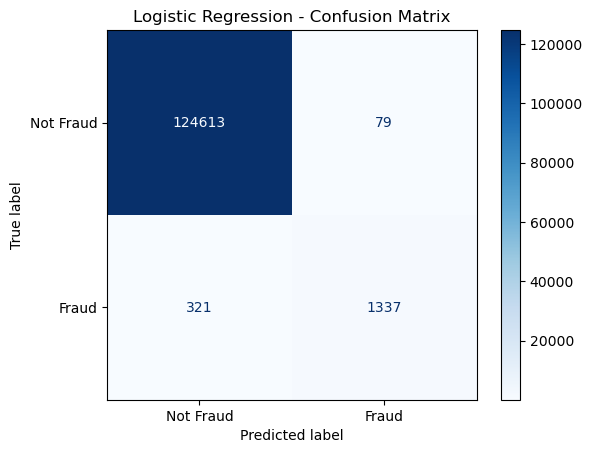

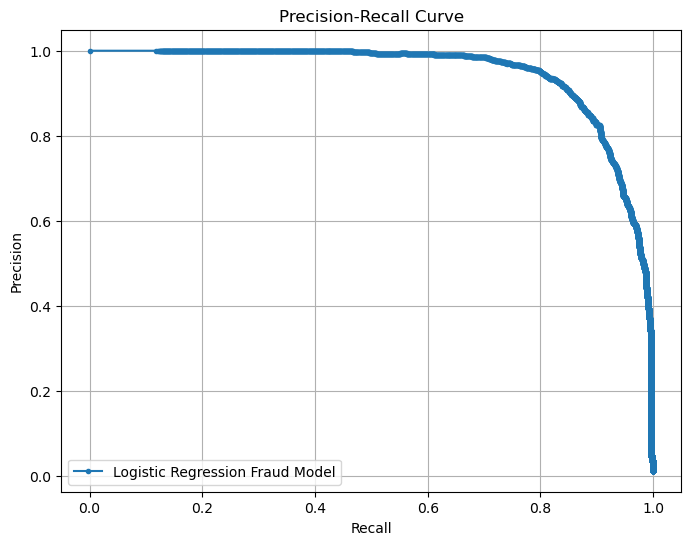


Model: Logistic Regression

Test Accuracy: 0.9968
Test Precision: 0.9442
Test Recall: 0.8064
F1 Score: 0.8699


In [85]:
max_iter=1000

log_reg_model = train_log_model(dataset1, max_iter, X_train_sampled, X_val_sampled, y_train_sampled, y_val_sampled)

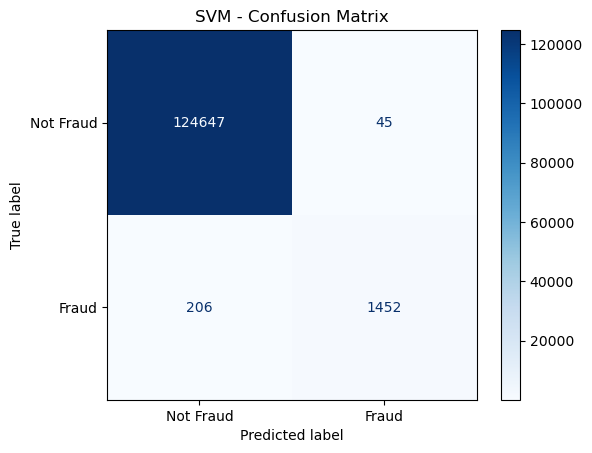

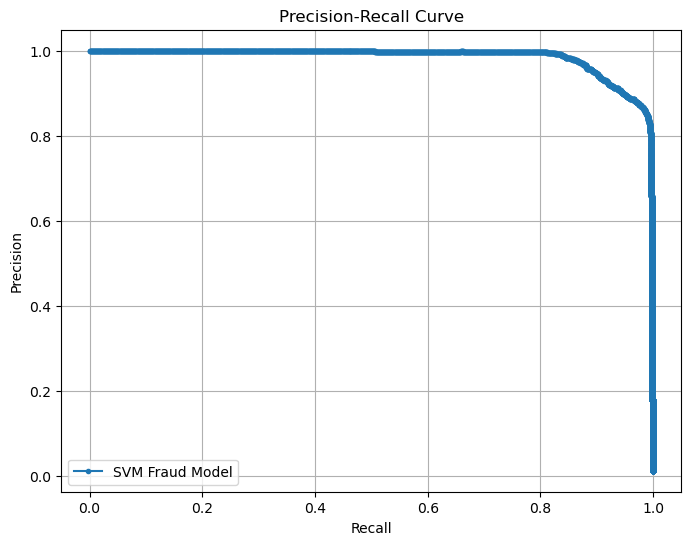


Model: SVM

Test Accuracy: 0.9980
Test Precision: 0.9699
Test Recall: 0.8758
F1 Score: 0.9204


In [86]:
SVM_model = train_svm(dataset1, 'rbf', 10, X_train_sampled, X_val_sampled, y_train_sampled, y_val_sampled)

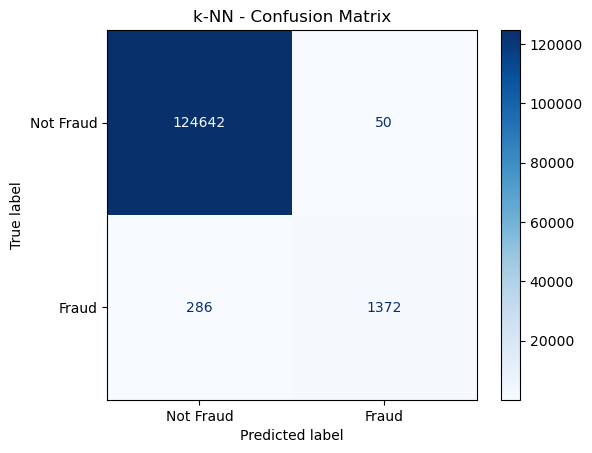

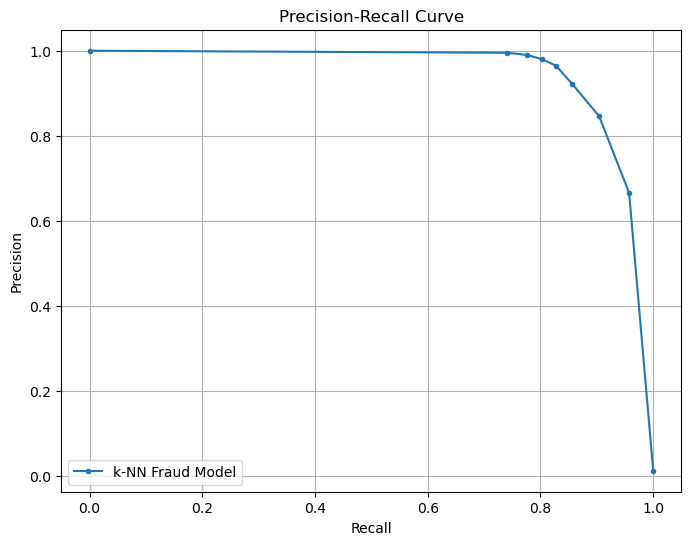


Model: k-NN

Test Accuracy: 0.9973
Test Precision: 0.9648
Test Recall: 0.8275
F1 Score: 0.8909


In [87]:
n_neighbors=7
k_nn = train_knn(dataset1, n_neighbors, X_train_sampled, X_val_sampled, y_train_sampled, y_val_sampled)

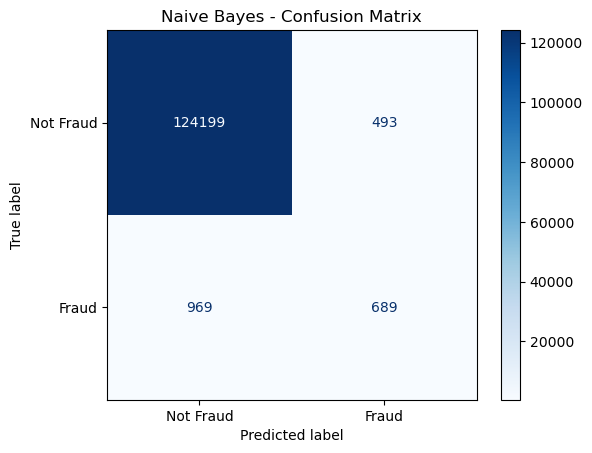

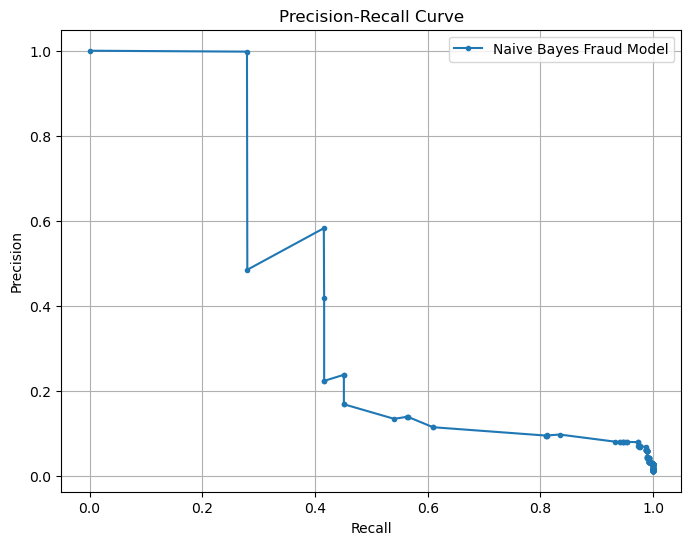


Model: Naive Bayes

Test Accuracy: 0.9884
Test Precision: 0.5829
Test Recall: 0.4156
F1 Score: 0.4852


In [89]:
naive_bayes = train_naive_bayes(dataset1, X_train_sampled, X_val_sampled, y_train_sampled, y_val_sampled)

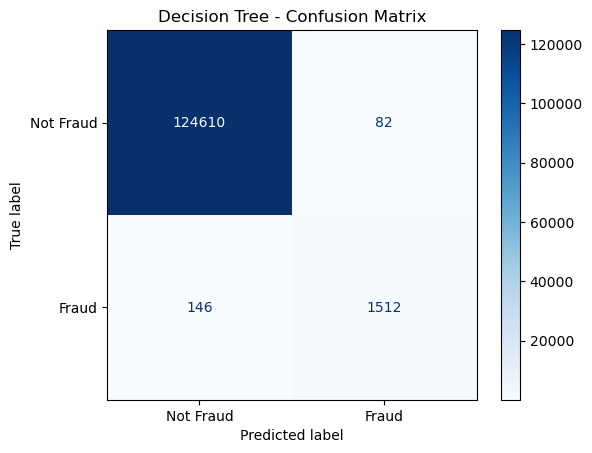

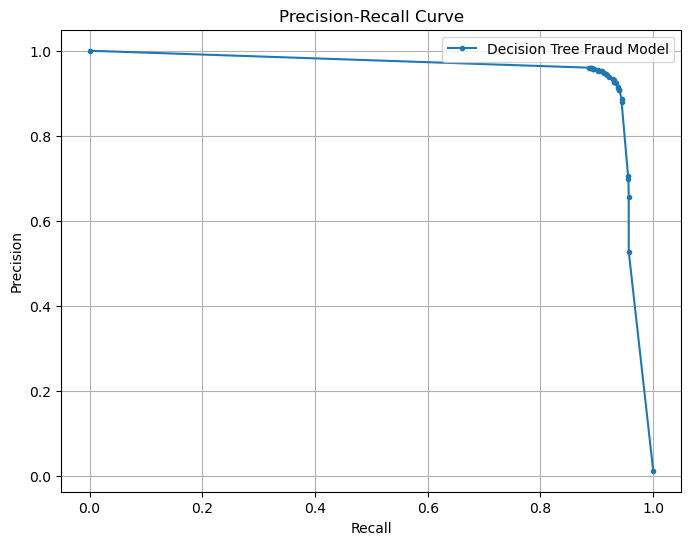


Model: Decision Tree

Test Accuracy: 0.9982
Test Precision: 0.9486
Test Recall: 0.9119
F1 Score: 0.9299


In [95]:
max_depth=15
decision_tree = train_decision_tree(dataset1, max_depth, X_train_sampled, X_val_sampled, y_train_sampled, y_val_sampled)

In [96]:
from sklearn.datasets import load_digits
import torch
from torch.utils.data import DataLoader, TensorDataset
    
   # Convert to tensors
def to_tensor(X_train, X_val, X_test, y_train, y_val, y_test):
    X_train = torch.tensor(X_train, dtype=torch.float32)
    X_val = torch.tensor(X_val, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32)
    y_val = torch.tensor(y_val, dtype=torch.float32)
    y_test = torch.tensor(y_test, dtype=torch.float32)
 
    print(X_train.shape)
    print(y_train.shape)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

def create_loaders(df, X_train, X_val, X_test, y_train, y_val, y_test, batch_size):
    
    # Create tensor datasets
    train_dataset = TensorDataset(X_train, y_train)
    validation_dataset = TensorDataset(X_val, y_val)
    test_dataset = TensorDataset(X_test, y_test)
    
    # Create data loaders (shuffle training set)
    train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle=True, drop_last = True)
    validation_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle = False)
    test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle=False)
    
    return train_loader, validation_loader, test_loader


In [97]:
X_train_sampled, X_val_sampled, X_test_sampled, y_train_sampled, y_val_sampled, y_test_sampled = to_tensor(X_train_sampled, 
                                                                                                                         X_val_sampled, 
                                                                                                                         X_test_sampled, 
                                                                                                                         y_train_sampled, 
                                                                                                                         y_val_sampled, 
                                                                                                                         y_test_sampled)

sampled_training, sampled_validation, sampled_test = create_loaders(dataset1, 
                                                                    X_train_sampled, 
                                                                    X_val_sampled, 
                                                                    X_test_sampled, 
                                                                    y_train_sampled, 
                                                                    y_val_sampled, 
                                                                    y_test_sampled, 
                                                                    batch_size = 256)

torch.Size([379050, 13])
torch.Size([379050])


In [98]:
X_train_unsampled, X_val_unsampled, X_test_unsampled, y_train_unsampled, y_val_unsampled, y_test_unsampled = to_tensor(X_train_unsampled, 
                                                                                                                                     X_val_unsampled, 
                                                                                                                                     X_test_unsampled, 
                                                                                                                                     y_train_unsampled, 
                                                                                                                                     y_val_unsampled, 
                                                                                                                                     y_test_unsampled)

unsampled_training, unsampled_validation, unsampled_test = create_loaders(dataset2, 
                                                                          X_train_unsampled, 
                                                                          X_val_unsampled, 
                                                                          X_test_unsampled, 
                                                                          y_train_unsampled, 
                                                                          y_val_unsampled,
                                                                          y_test_unsampled, 
                                                                          batch_size = 2048)

torch.Size([3817572, 13])
torch.Size([3817572])


In [99]:
import torch
import torch.nn as nn
import torch.nn.functional as F

activation_functions = {
    "relu": nn.ReLU(),
    "leaky_relu": nn.LeakyReLU(),
    "sigmoid": nn.Sigmoid(),
    "tanh": nn.Tanh(),
    "softmax": nn.Softmax(dim=1),
    "elu": nn.ELU(),
    "p_relu": nn.PReLU(),
    "rrelu": nn.RReLU(),
    "log_sigmoid": nn.LogSigmoid,
    "silu": nn.SiLU()
}

class FraudClassifier(nn.Module):
    def __init__(self, input_size, output_size, hidden_layers, activations):
        super(FraudClassifier, self).__init__()
        # Input validation
        if len(hidden_layers) != len(activations):
            raise ValueError("Each hidden layer must have a corresponding activation function")

        self.layers = nn.ModuleList()
        self.activations = []

        prev_size = input_size
        for size, act in zip(hidden_layers, activations):
            self.layers.append(nn.Linear(prev_size, size))
            self.activations.append(activation_functions[act.lower()])
            prev_size = size

        # Output layer (1 node for binary classification)
        self.output_layer = nn.Linear(prev_size, output_size)

    def forward(self, x):
        for layer, activation in zip(self.layers, self.activations):
            x = activation(layer(x))
        x = self.output_layer(x)  # raw logits
        return x.view(-1)  # flatten for BCEWithLogitsLoss

In [100]:
from tqdm import tqdm

# Method for training the nn model for nth times based on the number of epochs specified 
def train_neural_network(model, train_loader, loss_function, optimizer, device, threshold, epochs):
    # lists to store the loss and accuracy of each epoch
    loss_history = []
    accuracy_history = []
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    # loop through each epoch
    for epoch in tqdm(range(epochs), desc="Training", unit="epoch"):
        model.train() # Train the model
        running_loss = 0.0 # Accumulate loss over each epoch
        correct = 0 # Count of correct prediction
        total = 0 # Total number of samples seen

        # Iterate over batches from the training data loader
        for batch_x, batch_y in train_loader:
            batch_x = batch_x.to(device)
            batch_y = batch_y.to(device).view(-1)
            optimizer.zero_grad() # Reset gradients
            logits = model(batch_x).view(-1) # Forward Pass
            loss = loss_function(logits, batch_y) # Compute loss
            loss.backward() # Backpropagation
            optimizer.step() # Update weights

            running_loss += loss.item() * batch_x.size(0) # Accumulate weighted batch loss
            preds = (torch.sigmoid(logits) >= threshold).float() # Get predicted classes
            correct += (preds == batch_y).sum().item() # Count correct predictions
            total += batch_y.size(0) # Update total samples

        # Compute average loss and accuracy for the epoch
        epoch_loss = running_loss / total
        epoch_accuracy = correct / total
        loss_history.append(epoch_loss)
        accuracy_history.append(epoch_accuracy)

        print(f"Epoch {epoch+1}: Loss = {epoch_loss:.4f}, Accuracy = {epoch_accuracy:.4f}")

    return model


In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def evaluate_nn_model(model, data_loader, device, threshold):
    model.eval()  # Set the model to evaluation mode
    all_probs = []
    all_predictions = []
    all_labels = []

    with torch.no_grad():  # Disable gradient calculation during evaluation
        for inputs, labels in data_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            labels = labels.view(-1)
            outputs = model(inputs).view(-1)

            probs = torch.sigmoid(outputs)    # probabilities between 0 and 1
            predictions = (probs >= threshold).float()  # Apply threshold on probs

            all_probs.extend(probs.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Convert lists to NumPy arrays

    all_probs = np.array(all_probs)
    all_predictions = np.array(all_predictions)
    all_labels = np.array(all_labels)

    cm = confusion_matrix(all_labels, all_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud']) 
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    # Calculate evaluation metrics
    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions, zero_division = 1)
    recall = recall_score(all_labels, all_predictions, zero_division=1)
    f1 = f1_score(all_labels, all_predictions, zero_division=1)

    # Compute precision-recall pairs for different thresholds
    precisions, recalls, thresholds = precision_recall_curve(all_labels, all_probs)
    
    # Plot the curve
    plt.figure(figsize=(8,6))
    plt.plot(recalls, precisions, marker='.', label='Fraud Model')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()
        
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Test Precision: {precision:.4f}")
    print(f"Test Recall: {recall:.4f}")
    print(f"Test F1_score: {f1:.4f}")
    


In [102]:
from torch import nn, optim
import matplotlib.pyplot as plt
import torch

optimizer_options = ["adam", "sgd", "momentum", "nesterov", "adagrad", "adadelta", "rmsprop"]

def perform(df, train_loader, test_loader, input_size, output_size, hidden_layers, activations, pos_weight, threshold, epochs, optimizer_index, lr, momentum):

    # Define model, loss function, and optimizer
    # Instantiate model, loss, and optimizer
    model = FraudClassifier(input_size=input_size, output_size=output_size, hidden_layers=hidden_layers, activations=activations)
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    # Get optimizer name from list
    optimizer_name = optimizer_options[optimizer_index].lower()

    # Select Optimiser
    if optimizer_name == "adam":
        optimizer = optim.Adam(model.parameters(), lr=lr)
    elif optimizer_name == "sgd":
        optimizer = optim.SGD(model.parameters(), lr=lr)
    elif optimizer_name == "momentum":
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
    elif optimizer_name == "nesterov":
        optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=True)
    elif optimizer_name == "adagrad":
        optimizer = optim.Adagrad(model.parameters(), lr=lr)
    elif optimizer_name == "adadelta":
        optimizer = optim.Adadelta(model.parameters(), lr=lr)
    elif optimizer_name == "rmsprop":
        optimizer = optim.RMSprop(model.parameters(), lr=lr, momentum=momentum)
    else:
        raise ValueError(f"Unknown optimizer: {optimizer_name}")
    
    # Compute pos_weight as a Tensor
    pos_weight_tensor = torch.tensor([pos_weight], dtype=torch.float).to(device)
    
    # Define the weighted loss
    loss_function = nn.BCEWithLogitsLoss(pos_weight=pos_weight_tensor)
    
    # Train
    fraud_nn = train_neural_network(
        model,
        train_loader,
        loss_function,
        optimizer,
        device,
        threshold,
        epochs
    )
    
    # Evaluate on test set
    fraud_nn.eval()
    correct = 0
    total = 0
    
    evaluate_nn_model(model, test_loader, device, threshold)

    return model

Training:   5%|▌         | 1/20 [00:07<02:25,  7.66s/epoch]

Epoch 1: Loss = 0.0372, Accuracy = 0.9902


Training:  10%|█         | 2/20 [00:15<02:20,  7.78s/epoch]

Epoch 2: Loss = 0.0230, Accuracy = 0.9935


Training:  15%|█▌        | 3/20 [00:23<02:12,  7.77s/epoch]

Epoch 3: Loss = 0.0214, Accuracy = 0.9936


Training:  20%|██        | 4/20 [00:30<02:01,  7.59s/epoch]

Epoch 4: Loss = 0.0209, Accuracy = 0.9938


Training:  25%|██▌       | 5/20 [00:38<01:53,  7.58s/epoch]

Epoch 5: Loss = 0.0200, Accuracy = 0.9944


Training:  30%|███       | 6/20 [00:45<01:44,  7.47s/epoch]

Epoch 6: Loss = 0.0192, Accuracy = 0.9950


Training:  35%|███▌      | 7/20 [00:52<01:36,  7.44s/epoch]

Epoch 7: Loss = 0.0181, Accuracy = 0.9949


Training:  40%|████      | 8/20 [01:00<01:30,  7.53s/epoch]

Epoch 8: Loss = 0.0181, Accuracy = 0.9955


Training:  45%|████▌     | 9/20 [01:07<01:22,  7.46s/epoch]

Epoch 9: Loss = 0.0176, Accuracy = 0.9954


Training:  50%|█████     | 10/20 [01:15<01:15,  7.54s/epoch]

Epoch 10: Loss = 0.0170, Accuracy = 0.9957


Training:  55%|█████▌    | 11/20 [01:23<01:08,  7.56s/epoch]

Epoch 11: Loss = 0.0179, Accuracy = 0.9953


Training:  60%|██████    | 12/20 [01:31<01:01,  7.72s/epoch]

Epoch 12: Loss = 0.0162, Accuracy = 0.9958


Training:  65%|██████▌   | 13/20 [01:38<00:53,  7.71s/epoch]

Epoch 13: Loss = 0.0165, Accuracy = 0.9956


Training:  70%|███████   | 14/20 [01:46<00:46,  7.69s/epoch]

Epoch 14: Loss = 0.0173, Accuracy = 0.9956


Training:  75%|███████▌  | 15/20 [01:55<00:39,  7.99s/epoch]

Epoch 15: Loss = 0.0180, Accuracy = 0.9961


Training:  80%|████████  | 16/20 [02:03<00:32,  8.10s/epoch]

Epoch 16: Loss = 0.0166, Accuracy = 0.9959


Training:  85%|████████▌ | 17/20 [02:12<00:24,  8.28s/epoch]

Epoch 17: Loss = 0.0160, Accuracy = 0.9961


Training:  90%|█████████ | 18/20 [02:19<00:15,  7.95s/epoch]

Epoch 18: Loss = 0.0150, Accuracy = 0.9966


Training:  95%|█████████▌| 19/20 [02:26<00:07,  7.80s/epoch]

Epoch 19: Loss = 0.0183, Accuracy = 0.9959


Training: 100%|██████████| 20/20 [02:34<00:00,  7.73s/epoch]

Epoch 20: Loss = 0.0158, Accuracy = 0.9964


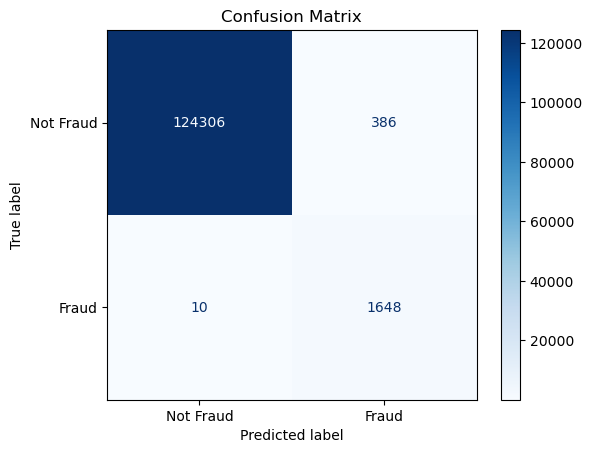

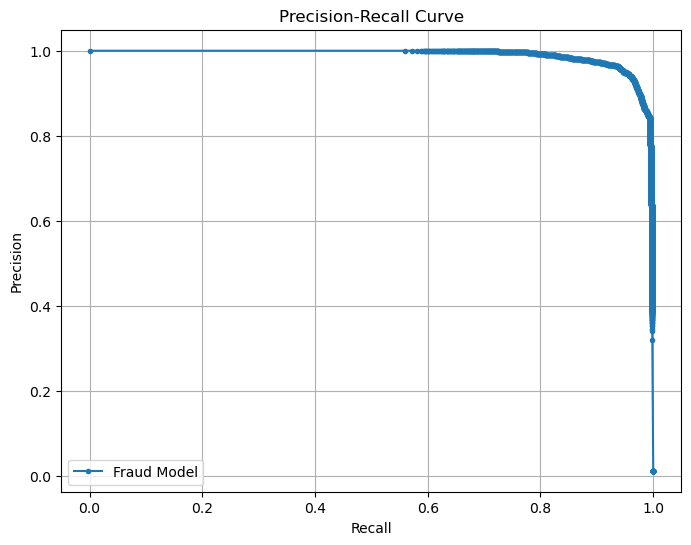

Test Accuracy: 0.9969
Test Precision: 0.8102
Test Recall: 0.9940
Test F1_score: 0.8927


In [105]:
pos_weight1 = 8
threshold1 = 0.35
epochs1 = 20
input_size = X_train_sampled.shape[1]
output_size = 1
hidden_layers = [36, 48, 28]  # could be changed by user
activations = ["relu", "leaky_relu", "elu"]

nn_model_one = perform(dataset1, 
                       sampled_training, 
                       sampled_validation, 
                       input_size, 
                       output_size, 
                       hidden_layers, 
                       activations, 
                       pos_weight = pos_weight1, 
                       threshold = threshold1, 
                       epochs = epochs1, 
                       optimizer_index=0, 
                       lr=0.01, 
                       momentum=0.9)

Training:   7%|▋         | 1/15 [01:10<16:29, 70.71s/epoch]

Epoch 1: Loss = 0.0183, Accuracy = 0.9803


Training:  13%|█▎        | 2/15 [02:20<15:12, 70.17s/epoch]

Epoch 2: Loss = 0.0039, Accuracy = 0.9991


Training:  20%|██        | 3/15 [03:27<13:44, 68.70s/epoch]

Epoch 3: Loss = 0.0035, Accuracy = 0.9991


Training:  27%|██▋       | 4/15 [04:36<12:36, 68.79s/epoch]

Epoch 4: Loss = 0.0031, Accuracy = 0.9991


Training:  33%|███▎      | 5/15 [05:47<11:35, 69.54s/epoch]

Epoch 5: Loss = 0.0029, Accuracy = 0.9990


Training:  40%|████      | 6/15 [06:54<10:19, 68.85s/epoch]

Epoch 6: Loss = 0.0028, Accuracy = 0.9990


Training:  47%|████▋     | 7/15 [08:01<09:06, 68.30s/epoch]

Epoch 7: Loss = 0.0027, Accuracy = 0.9990


Training:  53%|█████▎    | 8/15 [09:09<07:57, 68.18s/epoch]

Epoch 8: Loss = 0.0026, Accuracy = 0.9990


Training:  60%|██████    | 9/15 [10:17<06:47, 67.98s/epoch]

Epoch 9: Loss = 0.0025, Accuracy = 0.9991


Training:  67%|██████▋   | 10/15 [11:24<05:39, 67.84s/epoch]

Epoch 10: Loss = 0.0025, Accuracy = 0.9990


Training:  73%|███████▎  | 11/15 [12:32<04:30, 67.70s/epoch]

Epoch 11: Loss = 0.0024, Accuracy = 0.9991


Training:  80%|████████  | 12/15 [13:39<03:22, 67.61s/epoch]

Epoch 12: Loss = 0.0024, Accuracy = 0.9991


Training:  87%|████████▋ | 13/15 [14:47<02:15, 67.64s/epoch]

Epoch 13: Loss = 0.0023, Accuracy = 0.9991


Training:  93%|█████████▎| 14/15 [15:55<01:07, 67.65s/epoch]

Epoch 14: Loss = 0.0023, Accuracy = 0.9991


Training: 100%|██████████| 15/15 [17:02<00:00, 68.17s/epoch]

Epoch 15: Loss = 0.0023, Accuracy = 0.9991


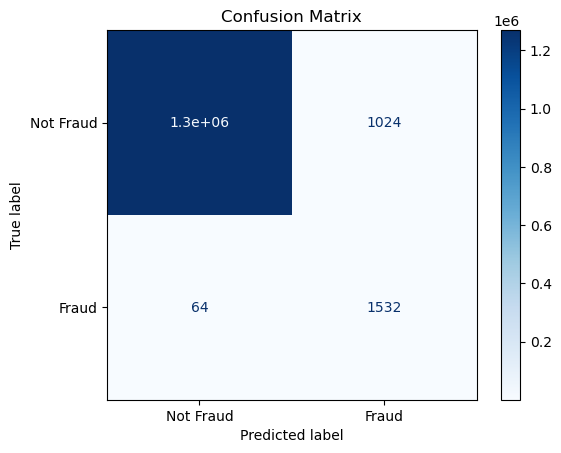

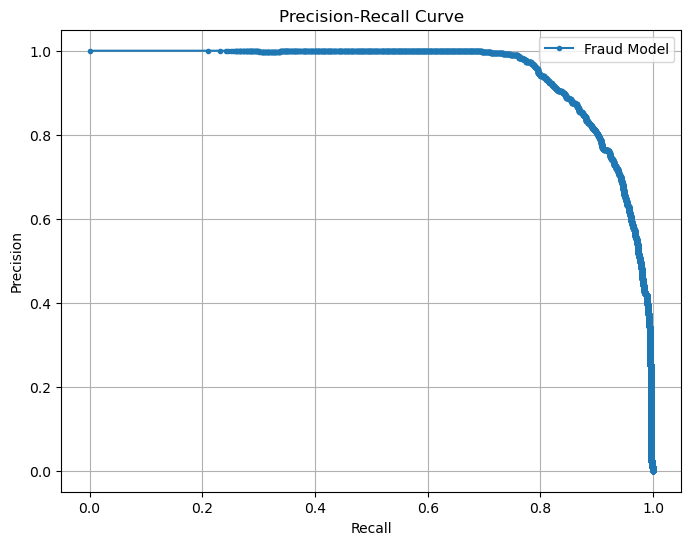

Test Accuracy: 0.9991
Test Precision: 0.5994
Test Recall: 0.9599
Test F1_score: 0.7380


In [104]:
pos_weight2 = 4.5
threshold2 = 0.275
epochs2 = 15
input_size = X_train_unsampled.shape[1]
output_size = 1
hidden_layers = [24, 36, 48, 28, 16] 
activations = ["relu", "leaky_relu", "relu", "rrelu", "relu"]

nn_model_two = perform(dataset2, 
                       unsampled_training, 
                       unsampled_validation, 
                       input_size, 
                       output_size, 
                       hidden_layers, 
                       activations, 
                       pos_weight = pos_weight2, 
                       threshold = threshold2, 
                       epochs = epochs2, 
                       optimizer_index=0, 
                       lr=0.001, 
                       momentum=0.9)

# Step 5: Model Evaluation

After training, it was essential to objectively measure how well the model performs, especially given the imbalanced nature of fraud detection. This stage focuses on assessing generalisation: how the model behaves on truly unseen data from the test set, rather than on the validation set used during development.

**Evaluation Process**

Using the held-out test sets, I evaluated each NN model with a custom classification threshold to control the trade-off between precision and recall. Predictions were passed through a sigmoid function and compared to the threshold to produce binary outputs. This step demonstrates the model’s ability to generalize beyond the training and validation splits, giving a realistic estimate of deployment performance.

**Metrics Used**

To get a comprehensive view of performance, I calculated the following:

* Accuracy: The overall correctness of the model's prediction
* Precision: The proportion of correctly identified True Positives out of all those that were predicted as fraud
* Recall: The proportion of True Positives out of all the actual fraud cases (This one mattered the most)
* F1-Score: The harmonic balance between precision and recall

**Confusion Matrix**

A confusion matrix was plotted to visualize the number of:

* True Positives (correct fraud detections)
* True Negatives (correct legitimate detections)
* False Positives (legitimate wrongly flagged)
* False Negatives (fraud detected as legitimate)

This gives an intuitive overview of the model’s decision quality and highlights areas where errors may be costly.

**Precision-Recall_Curve**

I also plotted the precision-recall curve, which is particularly informative in imbalanced datasets:
* Shows how precision and recall vary across different thresholds.
* Helps identify the optimal threshold to balance high fraud detection (recall) with minimal false alarms (precision).
* Provides more actionable insight than ROC-AUC in highly skewed problems, because it emphasizes performance on the positive (fraud) class.

This curve helps identify the optimal threshold to balance high fraud detection (recall) with minimising false alarms (precision).


This evaluation step is critical for verifying that the models are not just memorizing the training or validation data, but are truly capable of generalizing to unseen transactions, giving confidence in their practical deployment.

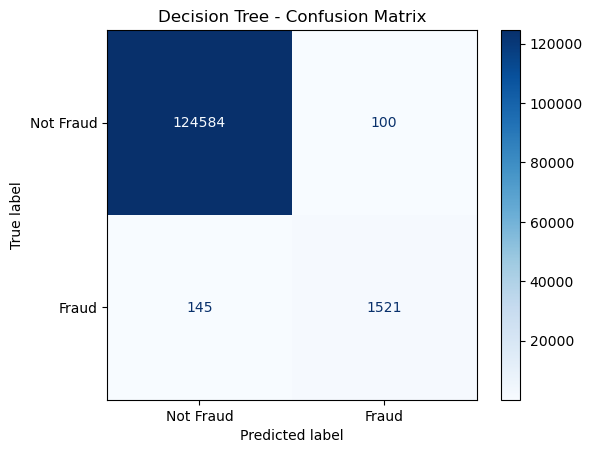

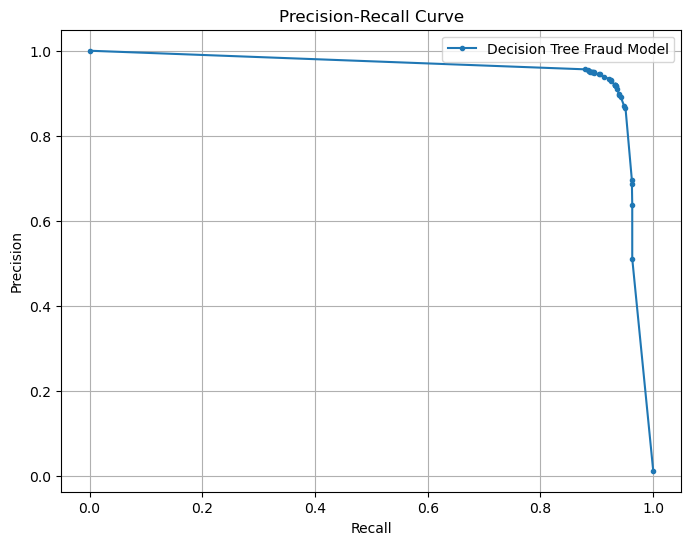


Model: Decision Tree

Test Accuracy: 0.9981
Test Precision: 0.9383
Test Recall: 0.9130
F1 Score: 0.9255


In [108]:
evaluate_baseline(decision_tree, 'Decision Tree', X_test_sampled, y_test_sampled)

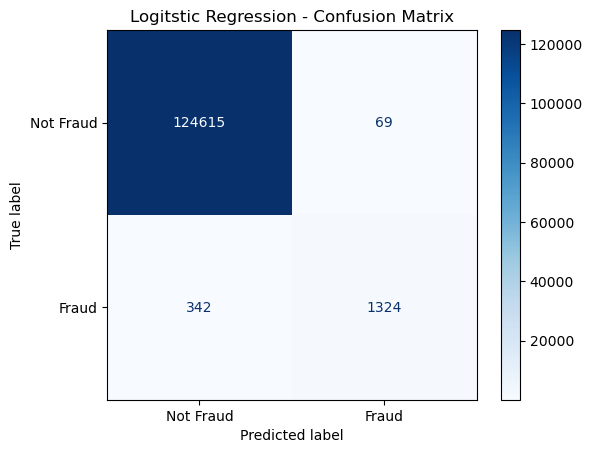

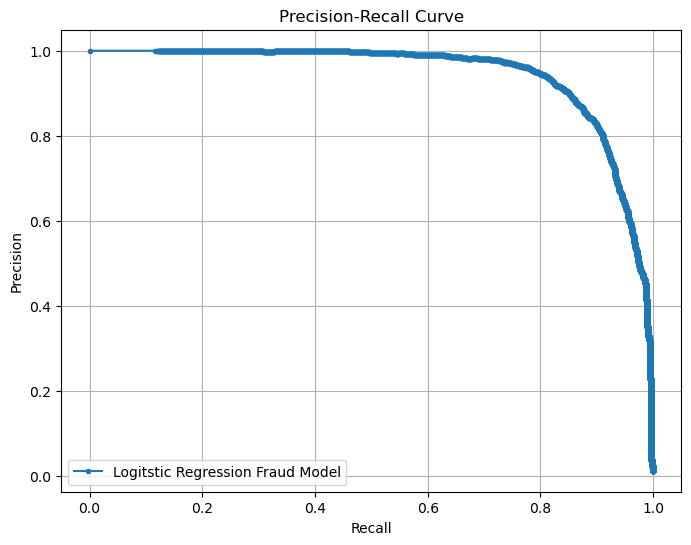


Model: Logitstic Regression

Test Accuracy: 0.9967
Test Precision: 0.9505
Test Recall: 0.7947
F1 Score: 0.8656


In [109]:
evaluate_baseline(log_reg_model, 'Logitstic Regression', X_test_sampled, y_test_sampled)

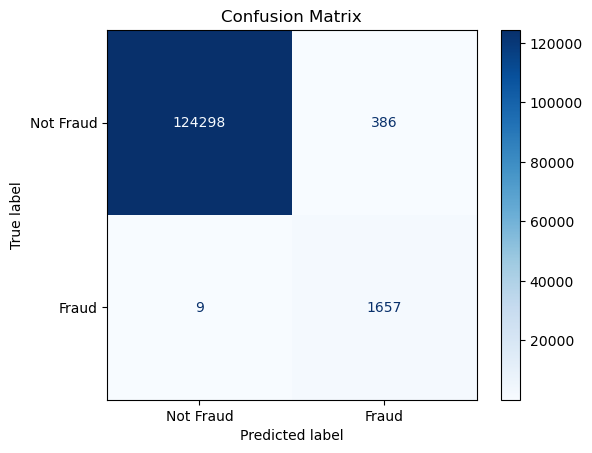

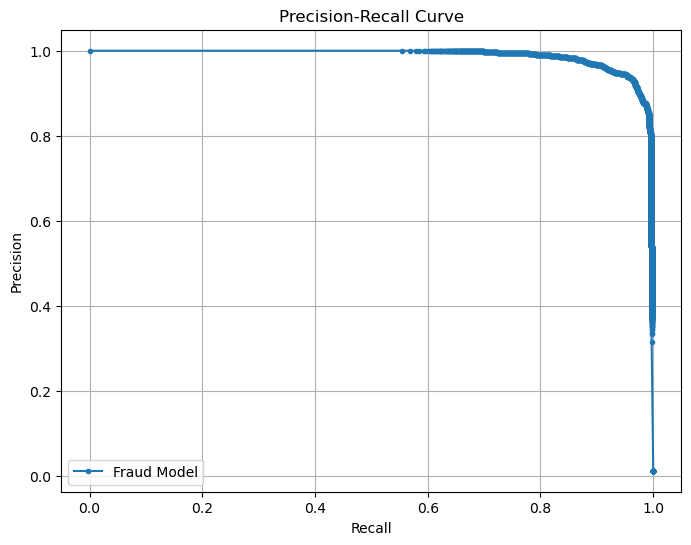

Test Accuracy: 0.9969
Test Precision: 0.8111
Test Recall: 0.9946
Test F1_score: 0.8935


In [110]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
nn_model_one.to(device) # Move the model to the device

evaluation_results = evaluate_nn_model(nn_model_one, sampled_test, device, threshold1)

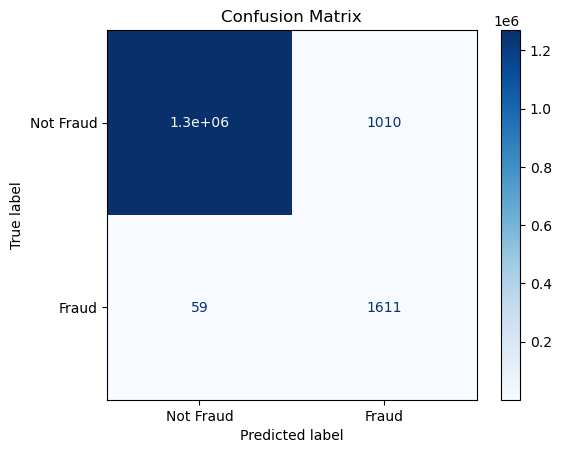

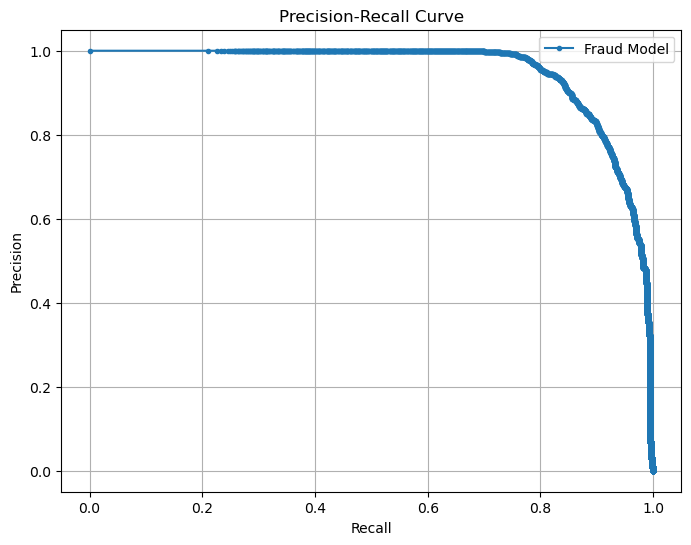

Test Accuracy: 0.9992
Test Precision: 0.6147
Test Recall: 0.9647
Test F1_score: 0.7509


In [111]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
nn_model_two.to(device) # Move the model to the device

evaluation_results = evaluate_nn_model(nn_model_two, unsampled_test, device, threshold2)

# Step 6: Deployment (Conceptual)

This step demonstrates a conceptual deployment setup for the fraud detection model. The goal is to show how the trained model and its schema could be exported, integrated, and served in an interactive interface. While this version runs inside Jupyter, the same design can be extended to a full web app.

Note: Not every step is inside the output. 

* Model Export: The trained neural network model is saved into a portable file format. This ensures the model can be reloaded later without retraining, making it reusable across different environments.
* Model Loading: A loading function is introduced to retrieve the exported model whenever needed. This step is important to establish a deployment workflow where the system can pull in a pre-trained model and apply it immediately.
* Schema Extraction: The schema of the training dataset is also preserved and exported. This includes the feature names and their expected data types (e.g., numeric, categorical, boolean). Capturing the schema ensures that any new input aligns with the structure used to train the model.
* Interactive Input Table: A placeholder transaction table is generated and displayed through an interactive editor. This allows a user to manually input or adjust transaction features in a structured way that matches the model’s expectations.
* Prediction Trigger: A prediction button is added to process the user-provided input. When triggered, the system evaluates the input against the trained model, displaying whether the transaction is classified as fraudulent or legitimate.
* Probability Display: If supported, the fraud probability is also provided alongside the classification, giving users an interpretable confidence score.
* Dataset Export Finally, the transformed dataset schema is exported for consistency, ensuring the training and deployment environments remain aligned.

This conceptual deployment stage bridges the transition from a trained model to an interactive application, illustrating how fraud predictions could be made accessible to end users.

In [120]:
import pickle

def export_model(model, name):
    filename = f"{name}.plk" 
    with open(filename, 'wb') as file:
           pickle.dump(model, file)
    print(f"{filename} exported successfully")

export_model(nn_model_two, "neural_network_model2")

def export_transformed_dataset(df, name):
    filename = f"{name}.pkl"
    df.to_pickle(filename)
    print(f"{filename} exported successfully")

export_transformed_dataset(X_train_unsampled, "train")
    

neural_network_model2.plk exported successfully
train.pkl exported successfully


In [122]:
import pandas as pd
import numpy as np
import pickle
from streamlit_jupyter import StreamlitPatcher

# Enable Streamlit inside Jupyter
StreamlitPatcher().jupyter()

import streamlit as st

# Load Pretrained Model 

@st.cache_resource
def load_model(path):
    with open(path, "rb") as f:
        return pickle.load(f)

model = load_model("neural_network_model2.plk")

# Load Dataset Schema (X_train_unsampled)

X_train = pd.read_pickle("train.pkl")  # <-- Ensure you saved it with pickle
feature_info = {}

# Extract column types directly from X_train
for col in X_train.columns:
    dtype = X_train[col].dtype
    if pd.api.types.is_numeric_dtype(dtype):
        feature_info[col] = float if dtype in [np.float32, np.float64] else int
    elif pd.api.types.is_bool_dtype(dtype):
        feature_info[col] = "bool"
    else:
        feature_info[col] = "category"


# Editable Table for Input

default_data = {
    col: [0 if dtype in [int, float] else False if dtype == "bool" else ""]
    for col, dtype in feature_info.items()
}

input_df = pd.DataFrame(default_data, columns=feature_info.keys())

st.subheader("Input Transaction Features")
edited_df = st.data_editor(input_df, num_rows="fixed", key="input_table")


# Prediction

if st.button("Predict Fraud"):
    row = edited_df.iloc[0:1].copy()

    # Ensure category/boolean consistency with training schema
    for col, dtype in feature_info.items():
        if dtype == "bool":
            row[col] = row[col].astype(bool)
        elif dtype == "category":
            row[col] = row[col].astype("category")

    prediction = model.predict(row)[0]
    proba = None
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(row)[0][1]

    st.subheader("Prediction Result")
    if prediction == 1:
        st.error("This transaction is predicted as **FRAUD**.")
    else:
        st.success("This transaction is predicted as **LEGITIMATE**.")

    if proba is not None:
        st.write(f"Fraud Probability: **{proba:.2f}**")


### Input Transaction Features

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,differenceOrg,differenceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,0,0,0,0,0,0,0,0,0,0


# What's Next?

With this current pipeline serving as the main logic of fraud data mining, the next project will focus on building a no-code fraud detection application. This tool will allow users to perform all of the functionalities from the current pipeline: including data exploration, preprocessing, modelling and training, evaluation, and deployment — without writing a line of code. The application will provide an intuitive interface where datasets can be uploaded, models can be selected, and results visualized in real time. The goal is to transform the current notebook-based workflow into a fully interactive platform accessible to business users and analysts, bridging the gap between technical complexity and practical usability.